In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
netflix = pd.read_csv('netflix daily top 10.csv')
netflix.head(10)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
5,2020-04-01,6,6,-,Car Masters: Rust to Riches,TV Show,Yes,"Sep 14, 2018",4,14
6,2020-04-01,7,10,-,Unorthodox,TV Show,Yes,"Mar 26, 2020",2,5
7,2020-04-01,8,7,5,Love is Blind,TV Show,Yes,"Feb 13, 2020",9,40
8,2020-04-01,9,8,-,Badland,Movie,NaN,"Mar 26, 2020",4,11
9,2020-04-01,10,9,-,Uncorked,Movie,Yes,"Mar 27, 2020",4,15


In [3]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


In [4]:
netflix.nunique()

As of                   710
Rank                     10
Year to Date Rank        11
Last Week Rank           11
Title                   645
Type                      4
Netflix Exclusive         1
Netflix Release Date    414
Days In Top 10          428
Viewership Score        779
dtype: int64

In [5]:
netflix.duplicated().sum()

0

In [6]:
netflix.drop_duplicates(inplace = True)

In [7]:
netflix.isnull().sum()

As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64

### DATA CLEANING

In [8]:
netflix.drop('Netflix Exclusive', axis = 1, inplace=True)
netflix.head(10)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,"Mar 20, 2020",9,55
5,2020-04-01,6,6,-,Car Masters: Rust to Riches,TV Show,"Sep 14, 2018",4,14
6,2020-04-01,7,10,-,Unorthodox,TV Show,"Mar 26, 2020",2,5
7,2020-04-01,8,7,5,Love is Blind,TV Show,"Feb 13, 2020",9,40
8,2020-04-01,9,8,-,Badland,Movie,"Mar 26, 2020",4,11
9,2020-04-01,10,9,-,Uncorked,Movie,"Mar 27, 2020",4,15


In [9]:
mode_title = netflix.Title.dropna().mode().iloc[0]
netflix.Title.replace(np.nan, mode_title, inplace = True)

In [10]:
netflix['Title'].fillna(netflix['Title'].mode().iloc[0], inplace=True)


In [11]:
mode_title = netflix['Title'].dropna().mode()
if not mode_title.empty:
    mode_title = mode_title.iloc[0]
    netflix['Title'].replace(np.nan, mode_title, inplace=True)
else:
    print("No mode found for 'Title' column.")




In [12]:
netflix = netflix.sort_values(by = 'Netflix Release Date')
netflix.head(10)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Release Date,Days In Top 10,Viewership Score
6465,2022-01-07,6,7,-,The Longest Yard,Movie,"Apr 1, 2015",3,11
6519,2022-01-12,10,9,9,The Longest Yard,Movie,"Apr 1, 2015",8,26
6486,2022-01-09,7,7,-,The Longest Yard,Movie,"Apr 1, 2015",5,19
6496,2022-01-10,7,7,-,The Longest Yard,Movie,"Apr 1, 2015",6,23
6476,2022-01-08,7,6,-,The Longest Yard,Movie,"Apr 1, 2015",4,15
6456,2022-01-06,7,9,-,The Longest Yard,Movie,"Apr 1, 2015",2,6
6448,2022-01-05,9,-,-,The Longest Yard,Movie,"Apr 1, 2015",1,2
6508,2022-01-11,9,7,-,The Longest Yard,Movie,"Apr 1, 2015",7,25
36,2020-04-04,7,6,-,The Roommate,Movie,"Apr 1, 2020",3,13
35,2020-04-04,6,4,-,How to Fix a Drug Scandal,TV Show,"Apr 1, 2020",3,18


In [13]:
netflix.tail(10)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Release Date,Days In Top 10,Viewership Score
1664,2020-09-14,5,5,-,Get Organized with The Home…,TV Show,"Sep 9, 2020",5,32
1686,2020-09-16,7,7,-,Cuties,Movie,"Sep 9, 2020",5,18
1684,2020-09-16,5,5,-,Get Organized with The Home…,TV Show,"Sep 9, 2020",7,44
1633,2020-09-11,4,4,-,Get Organized with The Home…,TV Show,"Sep 9, 2020",2,14
1676,2020-09-15,7,7,-,Cuties,Movie,"Sep 9, 2020",4,14
1674,2020-09-15,5,5,-,Get Organized with The Home…,TV Show,"Sep 9, 2020",6,38
1665,2020-09-14,6,7,-,The Social Dilemma,Movie,"Sep 9, 2020",4,13
1673,2020-09-15,4,6,-,The Social Dilemma,Movie,"Sep 9, 2020",5,20
1708,2020-09-18,9,8,4,Get Organized with The Home…,TV Show,"Sep 9, 2020",9,49
1683,2020-09-16,4,4,-,The Social Dilemma,Movie,"Sep 9, 2020",6,27


In [14]:
netflix['Last Week Rank']
netflix.head(5)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Release Date,Days In Top 10,Viewership Score
6465,2022-01-07,6,7,-,The Longest Yard,Movie,"Apr 1, 2015",3,11
6519,2022-01-12,10,9,9,The Longest Yard,Movie,"Apr 1, 2015",8,26
6486,2022-01-09,7,7,-,The Longest Yard,Movie,"Apr 1, 2015",5,19
6496,2022-01-10,7,7,-,The Longest Yard,Movie,"Apr 1, 2015",6,23
6476,2022-01-08,7,6,-,The Longest Yard,Movie,"Apr 1, 2015",4,15


In [15]:
netflix['Last Week Rank'].replace('-', np.nan, inplace=True)
netflix['Last Week Rank'] = pd.to_numeric(netflix['Last Week Rank'], errors='coerce')  # Use 'errors' parameter to handle non-numeric values
mean_rank = round(netflix['Last Week Rank'].mean())  # Round the mean directly
netflix['Last Week Rank'].fillna(mean_rank, inplace=True)
netflix.head(5)


,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Release Date,Days In Top 10,Viewership Score
6465,2022-01-07,6,7,4.0,The Longest Yard,Movie,"Apr 1, 2015",3,11
6519,2022-01-12,10,9,9.0,The Longest Yard,Movie,"Apr 1, 2015",8,26
6486,2022-01-09,7,7,4.0,The Longest Yard,Movie,"Apr 1, 2015",5,19
6496,2022-01-10,7,7,4.0,The Longest Yard,Movie,"Apr 1, 2015",6,23
6476,2022-01-08,7,6,4.0,The Longest Yard,Movie,"Apr 1, 2015",4,15


In [16]:
netflix['Last Week Rank'].replace('-', np.nan, inplace=True)
netflix['Last Week Rank'] = pd.to_numeric(netflix['Last Week Rank'], errors='coerce')  # Use 'errors' parameter to handle non-numeric values
mean_rank = round(netflix['Last Week Rank'].mean())  # Round the mean directly
netflix['Last Week Rank'].fillna(mean_rank, inplace=True)

# Convert the column to integer
netflix['Last Week Rank'] = netflix['Last Week Rank'].astype(int)

netflix.head(5)


,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Release Date,Days In Top 10,Viewership Score
6465,2022-01-07,6,7,4,The Longest Yard,Movie,"Apr 1, 2015",3,11
6519,2022-01-12,10,9,9,The Longest Yard,Movie,"Apr 1, 2015",8,26
6486,2022-01-09,7,7,4,The Longest Yard,Movie,"Apr 1, 2015",5,19
6496,2022-01-10,7,7,4,The Longest Yard,Movie,"Apr 1, 2015",6,23
6476,2022-01-08,7,6,4,The Longest Yard,Movie,"Apr 1, 2015",4,15


In [17]:
netflix['Year to Date Rank'].replace('-', np.nan, inplace=True)
netflix['Year to Date Rank'] = pd.to_numeric(netflix['Year to Date Rank'], errors='coerce')  # Use 'errors' parameter to handle non-numeric values
mean_rank = round(netflix['Year to Date Rank'].mean())  # Round the mean directly
netflix['Year to Date Rank'].fillna(mean_rank, inplace=True)

# Convert the column to integer
netflix['Year to Date Rank'] = netflix['Year to Date Rank'].astype(int)

netflix.head(5)


,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Release Date,Days In Top 10,Viewership Score
6465,2022-01-07,6,7,4,The Longest Yard,Movie,"Apr 1, 2015",3,11
6519,2022-01-12,10,9,9,The Longest Yard,Movie,"Apr 1, 2015",8,26
6486,2022-01-09,7,7,4,The Longest Yard,Movie,"Apr 1, 2015",5,19
6496,2022-01-10,7,7,4,The Longest Yard,Movie,"Apr 1, 2015",6,23
6476,2022-01-08,7,6,4,The Longest Yard,Movie,"Apr 1, 2015",4,15


In [18]:
netflix['Rank'].replace('-', np.nan, inplace=True)
netflix['Rank'] = pd.to_numeric(round(netflix['Rank']))
mean_rank = netflix['Rank'].mean()
netflix['Rank'].fillna(mean_rank, inplace=True)
netflix.head(5)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Release Date,Days In Top 10,Viewership Score
6465,2022-01-07,6,7,4,The Longest Yard,Movie,"Apr 1, 2015",3,11
6519,2022-01-12,10,9,9,The Longest Yard,Movie,"Apr 1, 2015",8,26
6486,2022-01-09,7,7,4,The Longest Yard,Movie,"Apr 1, 2015",5,19
6496,2022-01-10,7,7,4,The Longest Yard,Movie,"Apr 1, 2015",6,23
6476,2022-01-08,7,6,4,The Longest Yard,Movie,"Apr 1, 2015",4,15


In [19]:
mode_type = netflix.Type.dropna().mode()[0]
netflix.Type.replace(np.nan, mode_type, inplace = True)

In [20]:
netflix.Type.isnull().sum()

0

In [21]:
print('Type    :', netflix['Type'].unique())
print('Rank    :', netflix['Rank'].unique())


Type    : ['Movie' 'TV Show' 'Stand-Up Comedy' 'Concert/Perf…']
Rank    : [ 6 10  7  9  8  4  5  3  2  1]


In [22]:
mean_viewershipscore = netflix['Viewership Score'].mean()
netflix['Viewership Score'].replace(np.nan, mean_viewershipscore, inplace = True)

In [23]:
netflix['Viewership Score'].isnull().sum()

0

<Axes: xlabel='Viewership Score', ylabel='Density'>

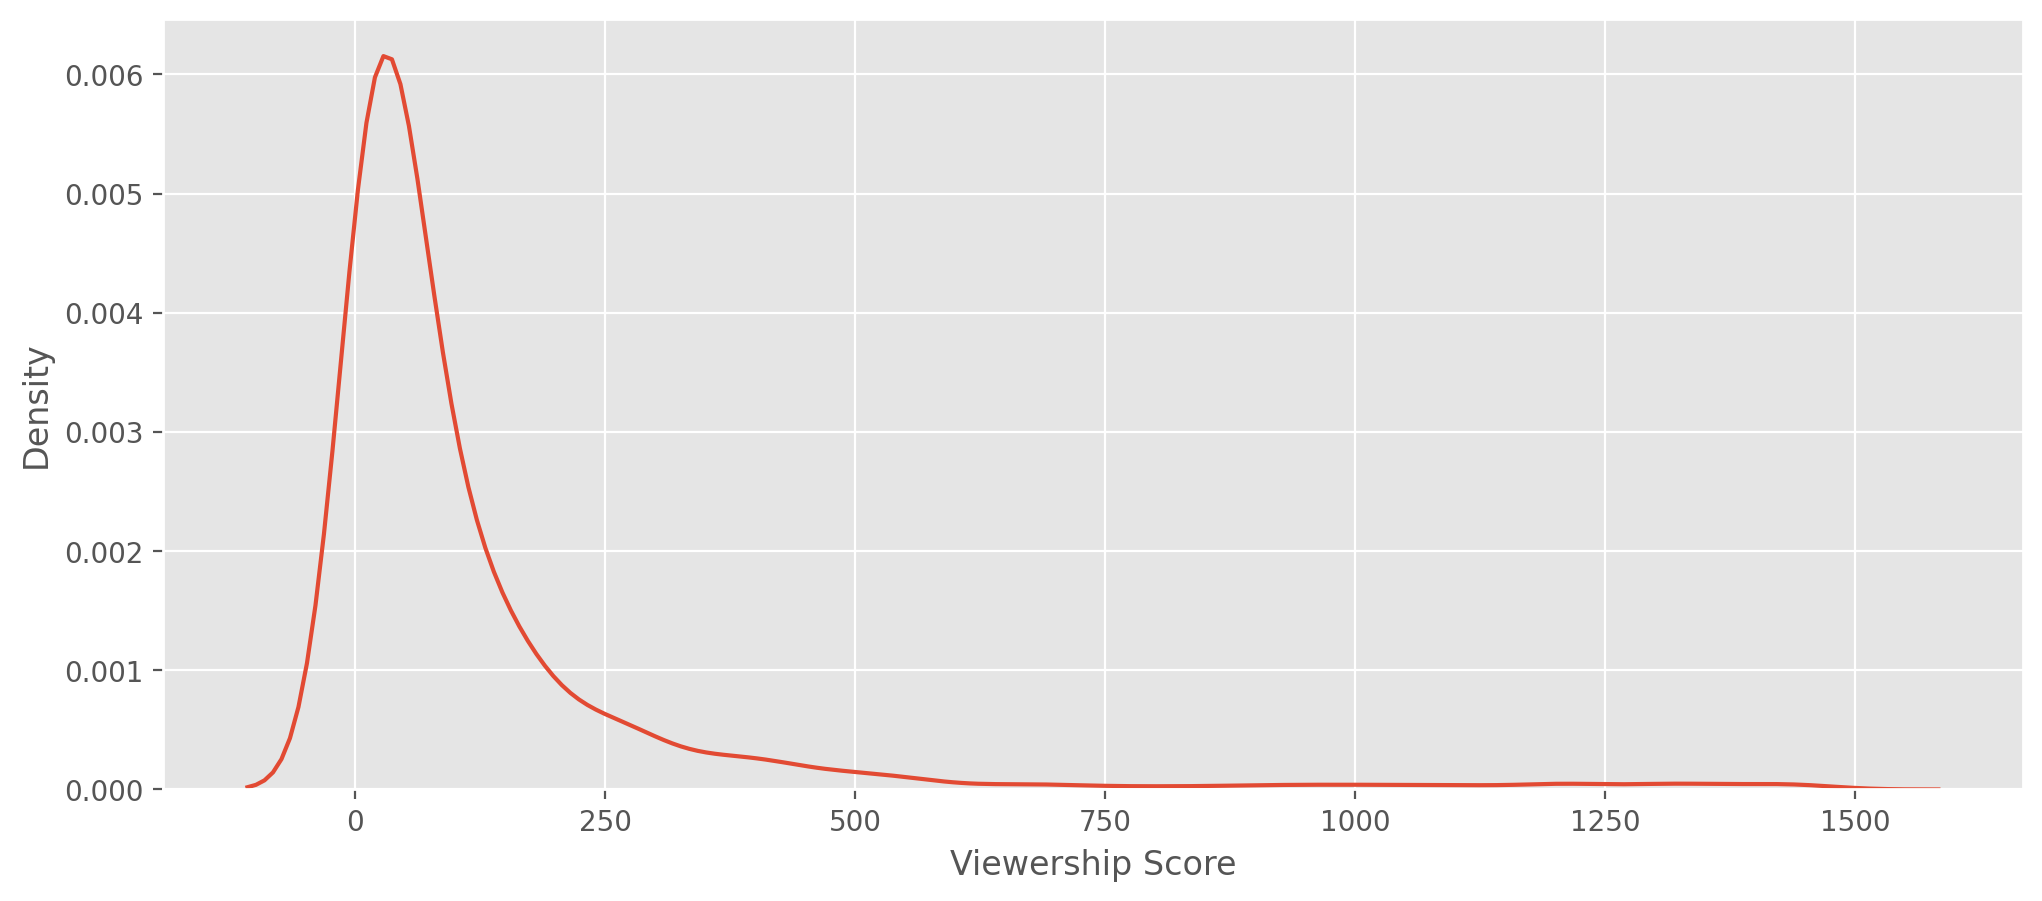

In [24]:
plt.figure(figsize=(12, 5), dpi=200)
sns.distplot(netflix['Viewership Score'], hist=False)


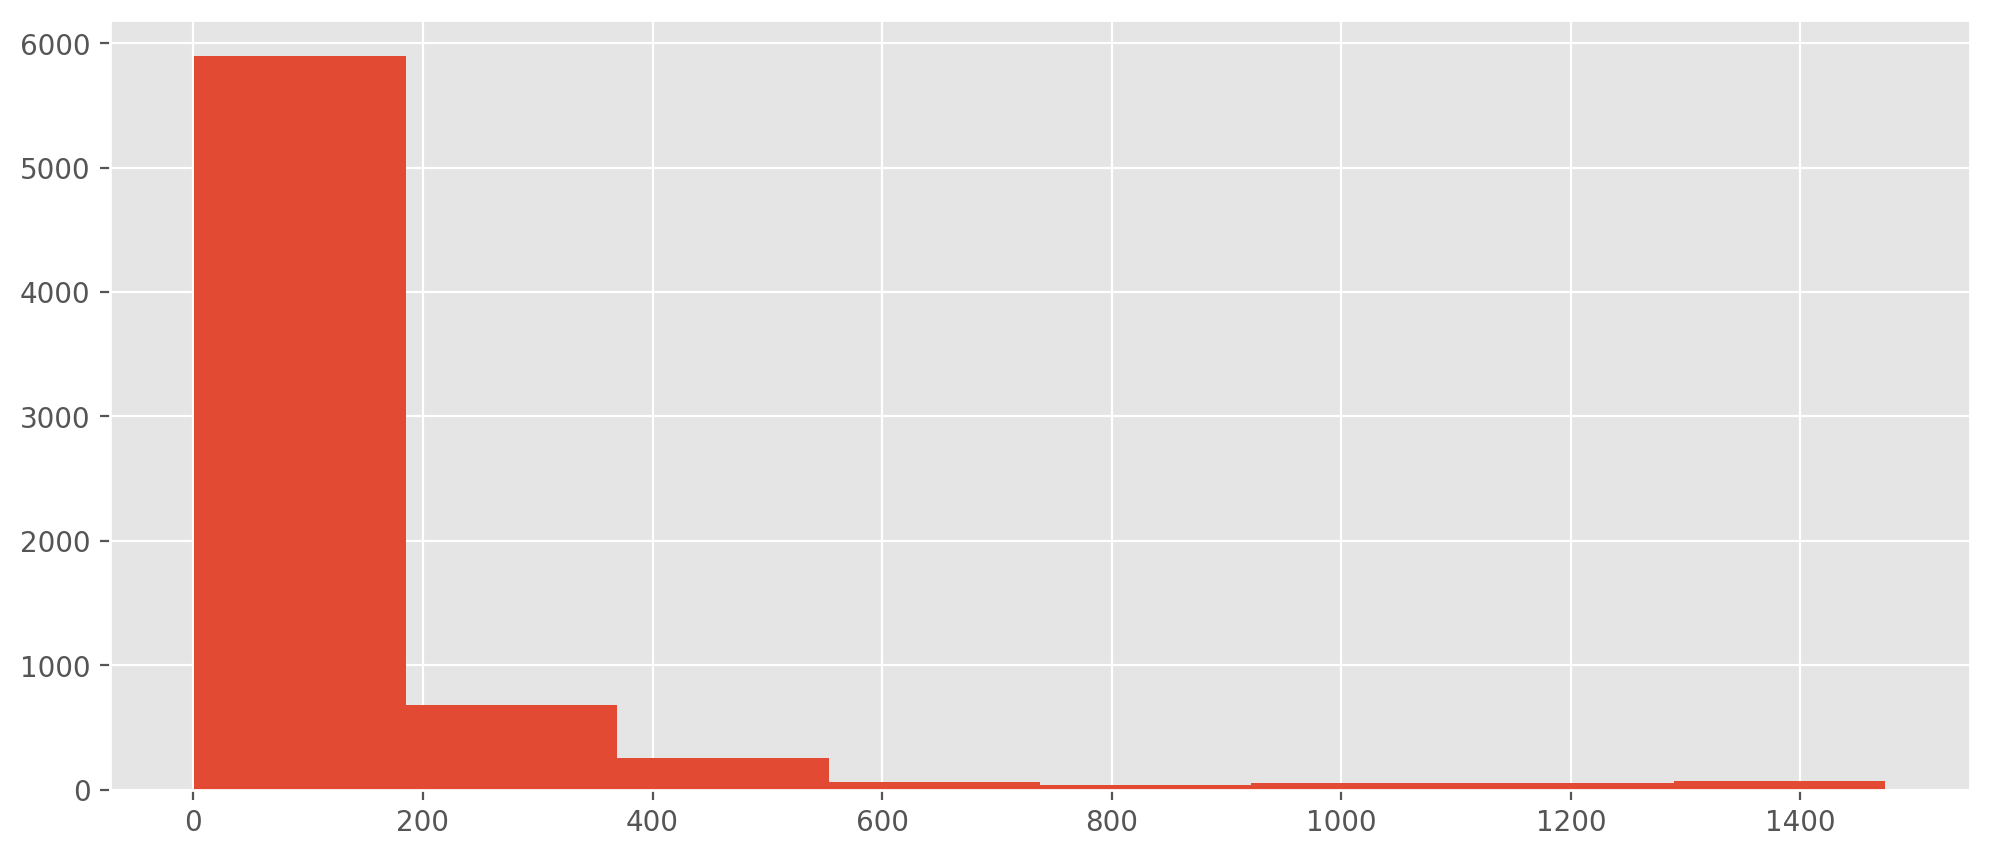

In [25]:
plt.figure(figsize=(12, 5), dpi=200)
plt.hist(netflix['Viewership Score'], bins = 8)
plt.show()


<Axes: ylabel='Viewership Score'>

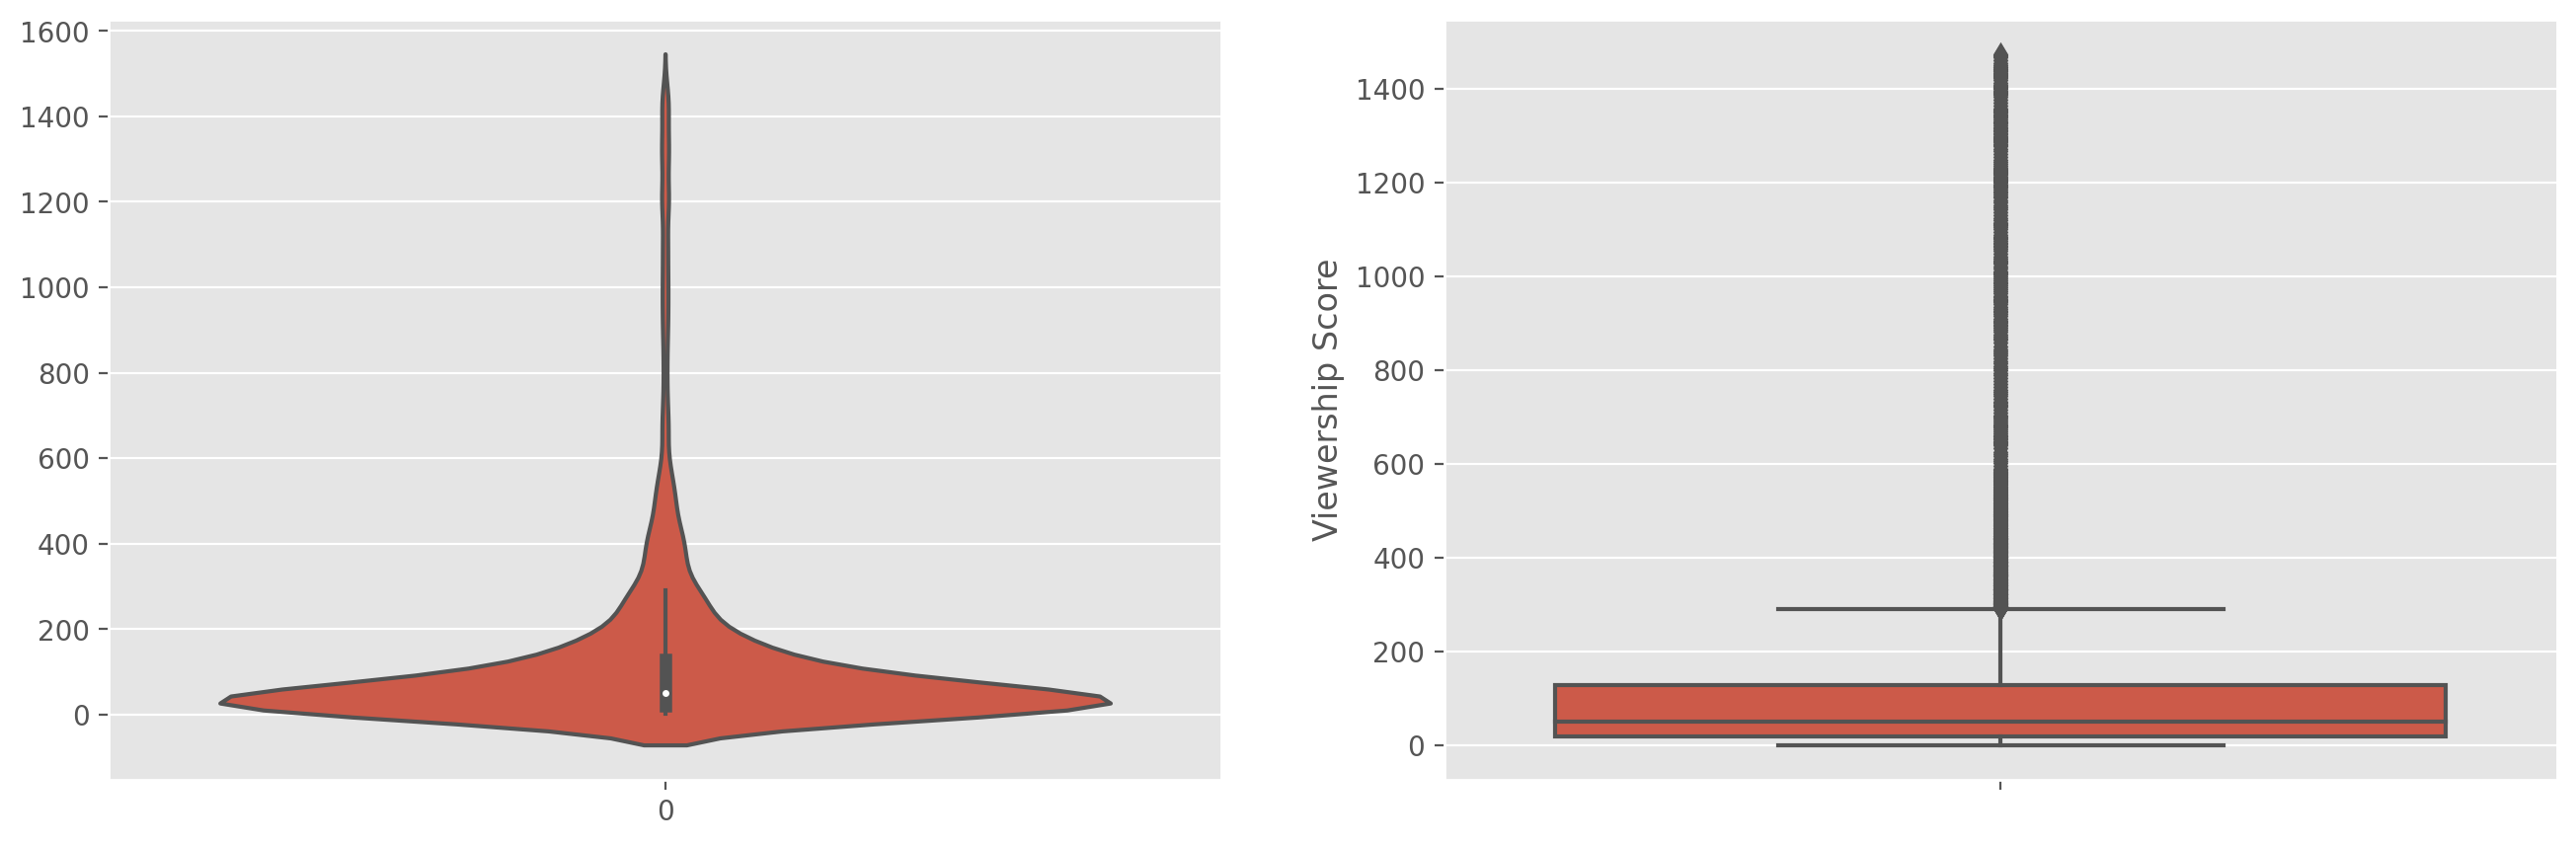

In [26]:
plt.figure(figsize = (16,5), dpi = 200)
plt.subplot(1,2,1)
sns.violinplot(netflix['Viewership Score'], hist = False)
plt.subplot(1,2,2)
sns.boxplot(y=netflix['Viewership Score'])


### Top 10 viewscore  :  movie in 2020 t0 2022

In [67]:

#  'Date' is the column containing date information and 'ViewScore' is the column for view scores
netflix['Date'] = pd.to_datetime(netflix['As of'])
start_date = '01-01-2020' 
end_date = '31-12-2022'     

#  data for the specified two-year period
data = netflix[(netflix['Date'] >= start_date) & (netflix['Date'] <= end_date)]

# Sort the DataFrame by 'ViewScore' in descending order
sorted_data = data.sort_values(by='Viewership Score', ascending=False)

# Select the top 10 rows
top_10_viewscores = sorted_data.head(10)

# Print or use the top 10 view scores as needed
print(top_10_viewscores)


          As of  Rank  Year to Date Rank  Last Week Rank      Title     Type  \
6998 2022-03-01     9                  5               4  Cocomelon  TV Show   
6959 2022-02-25    10                  5               4  Cocomelon  TV Show   
6718 2022-02-01     9                  5               7  Cocomelon  TV Show   
6687 2022-01-29     8                  5               8  Cocomelon  TV Show   
6674 2022-01-28     5                  6               4  Cocomelon  TV Show   
6665 2022-01-27     6                  6               4  Cocomelon  TV Show   
6655 2022-01-26     6                  7               4  Cocomelon  TV Show   
6646 2022-01-25     7                 10               4  Cocomelon  TV Show   
6639 2022-01-24    10                  5               4  Cocomelon  TV Show   
6617 2022-01-22     8                  5              10  Cocomelon  TV Show   

     Netflix Release Date  Days In Top 10  Viewership Score       Date  
6998           2020-06-01             428     

<Axes: xlabel='Type', ylabel='count'>

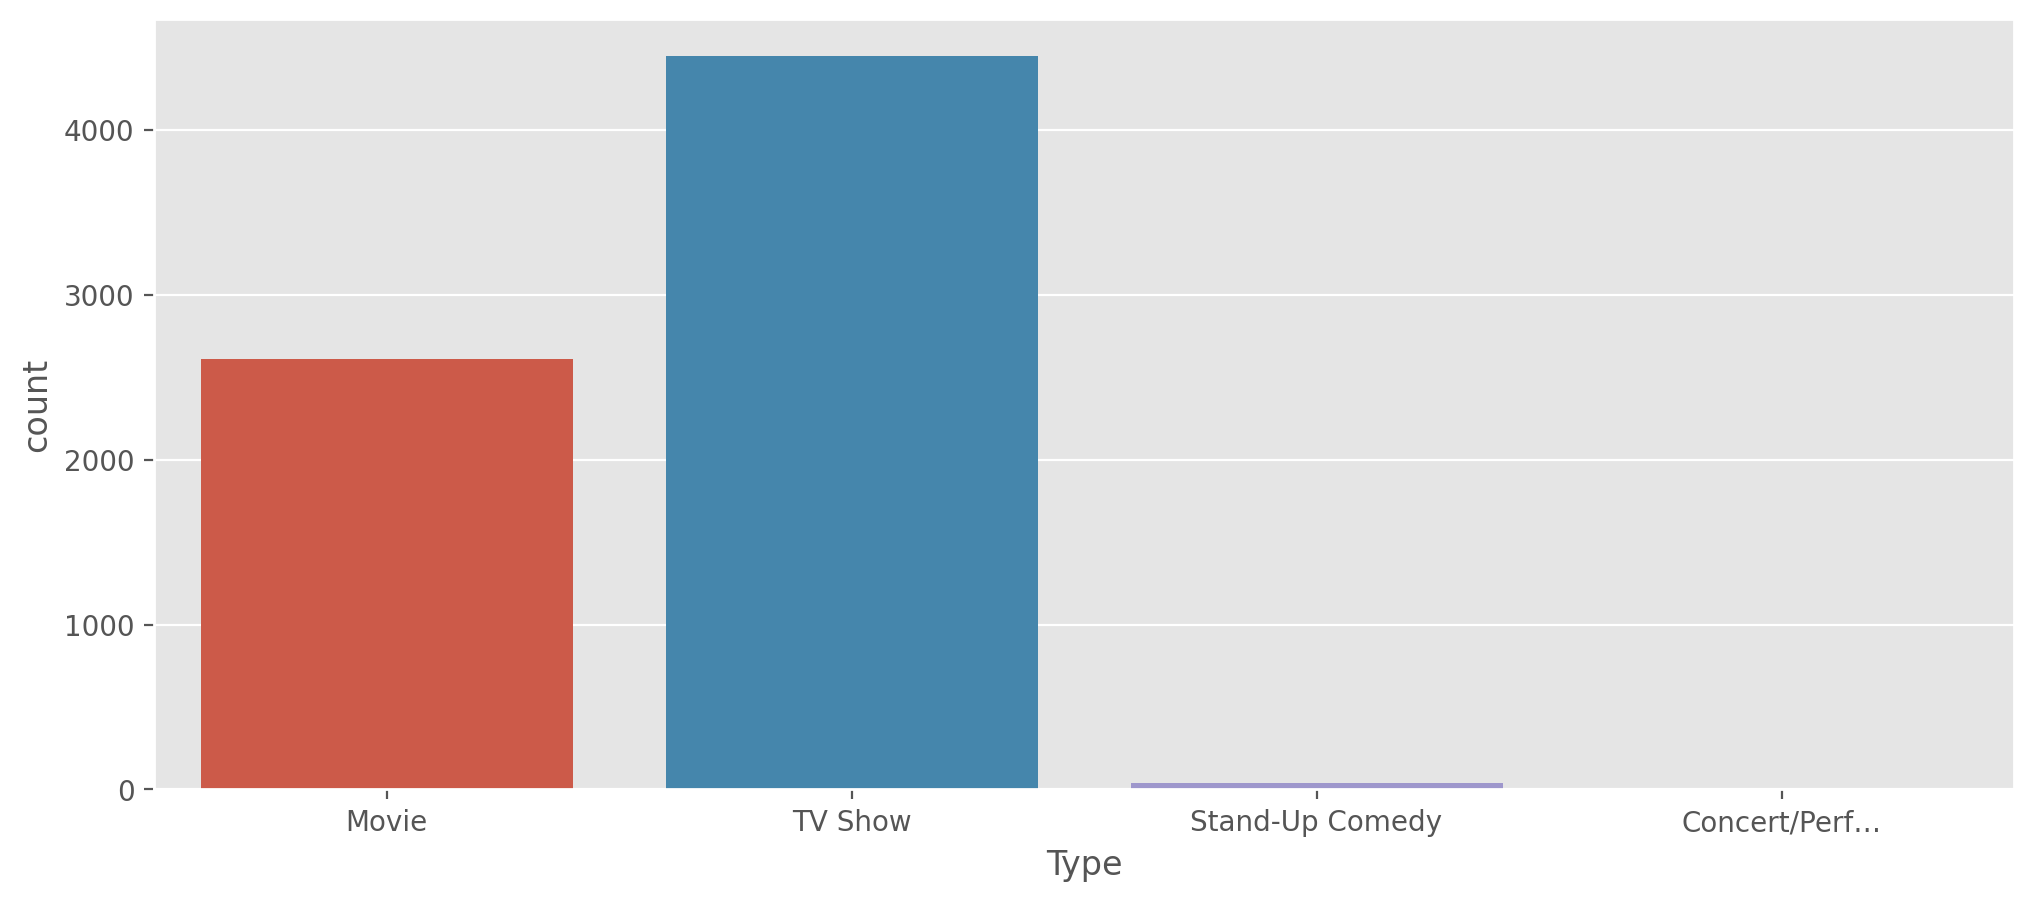

In [28]:
plt.figure(figsize = (12,5), dpi =200)
sns.countplot(x='Type', data = netflix)

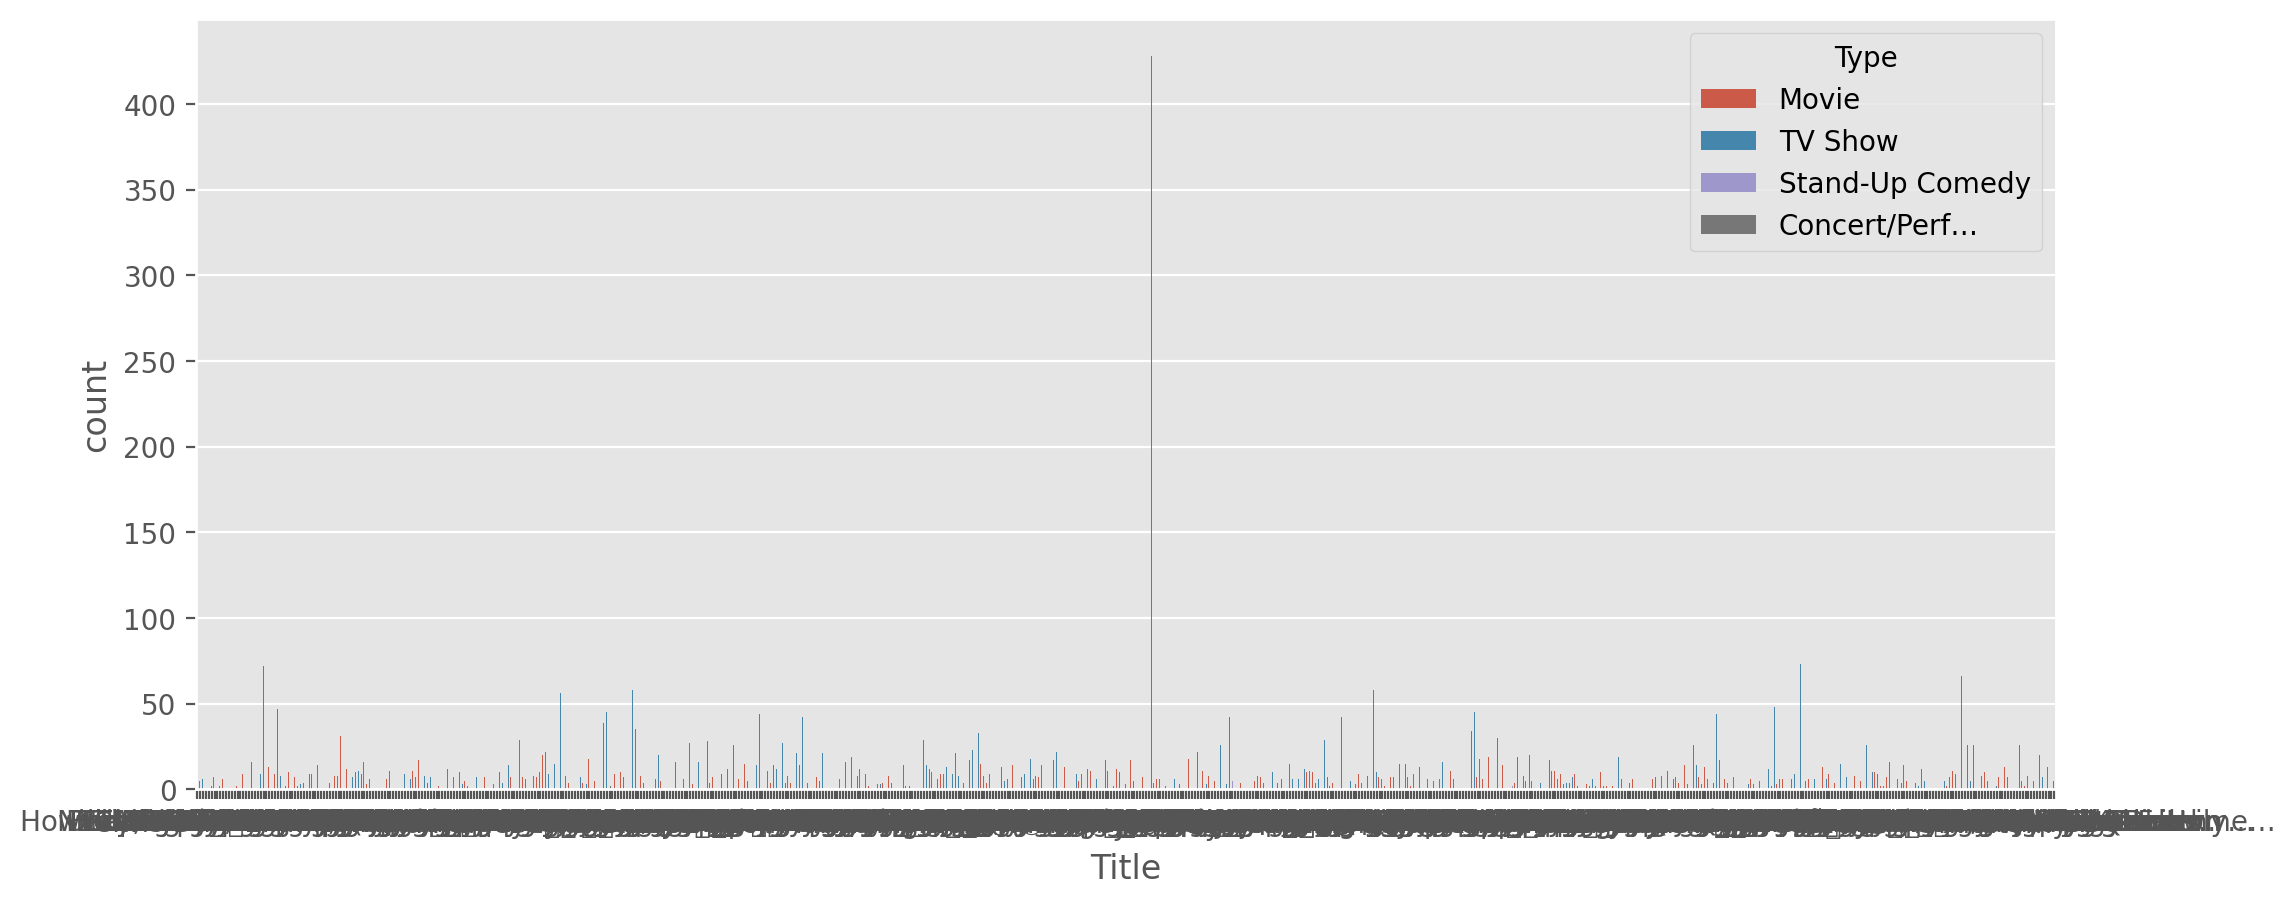

In [29]:

plt.figure(figsize=(12, 5), dpi=200)
sns.countplot(x='Title', hue='Type', data=netflix)

plt.show()  


<Axes: xlabel='count', ylabel='Title'>

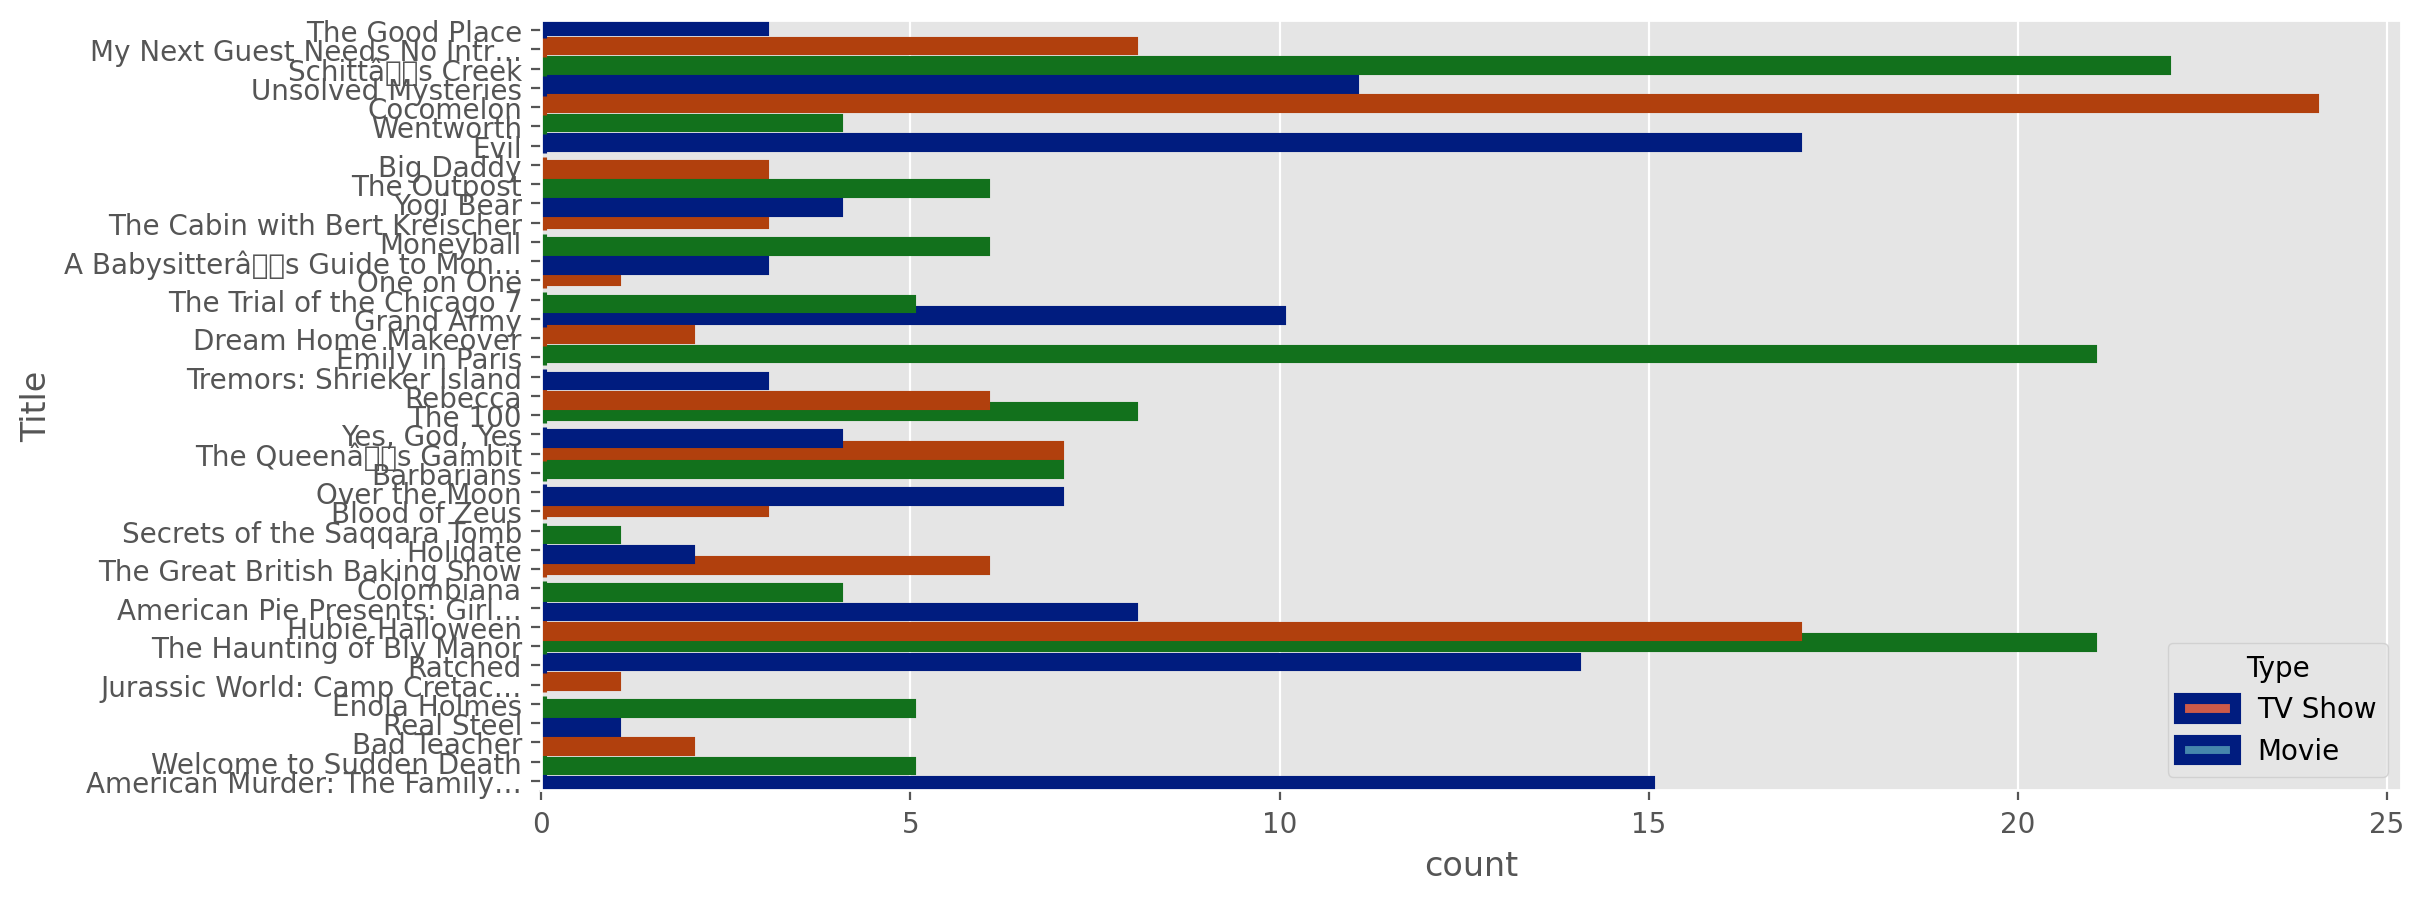

In [30]:
netflix['Date'] = pd.to_datetime(netflix['As of'])
start_date, end_date = '2020-10-01', '2020-10-30'
filtered_data = netflix[(netflix['Date'] >= start_date) & (netflix['Date'] <= end_date)]

plt.figure(figsize=(12, 5), dpi=200)
sns.countplot(y='Title', hue='Type', data=filtered_data, linewidth=4, edgecolor=sns.color_palette("dark", 3))


<Axes: xlabel='count', ylabel='Title'>

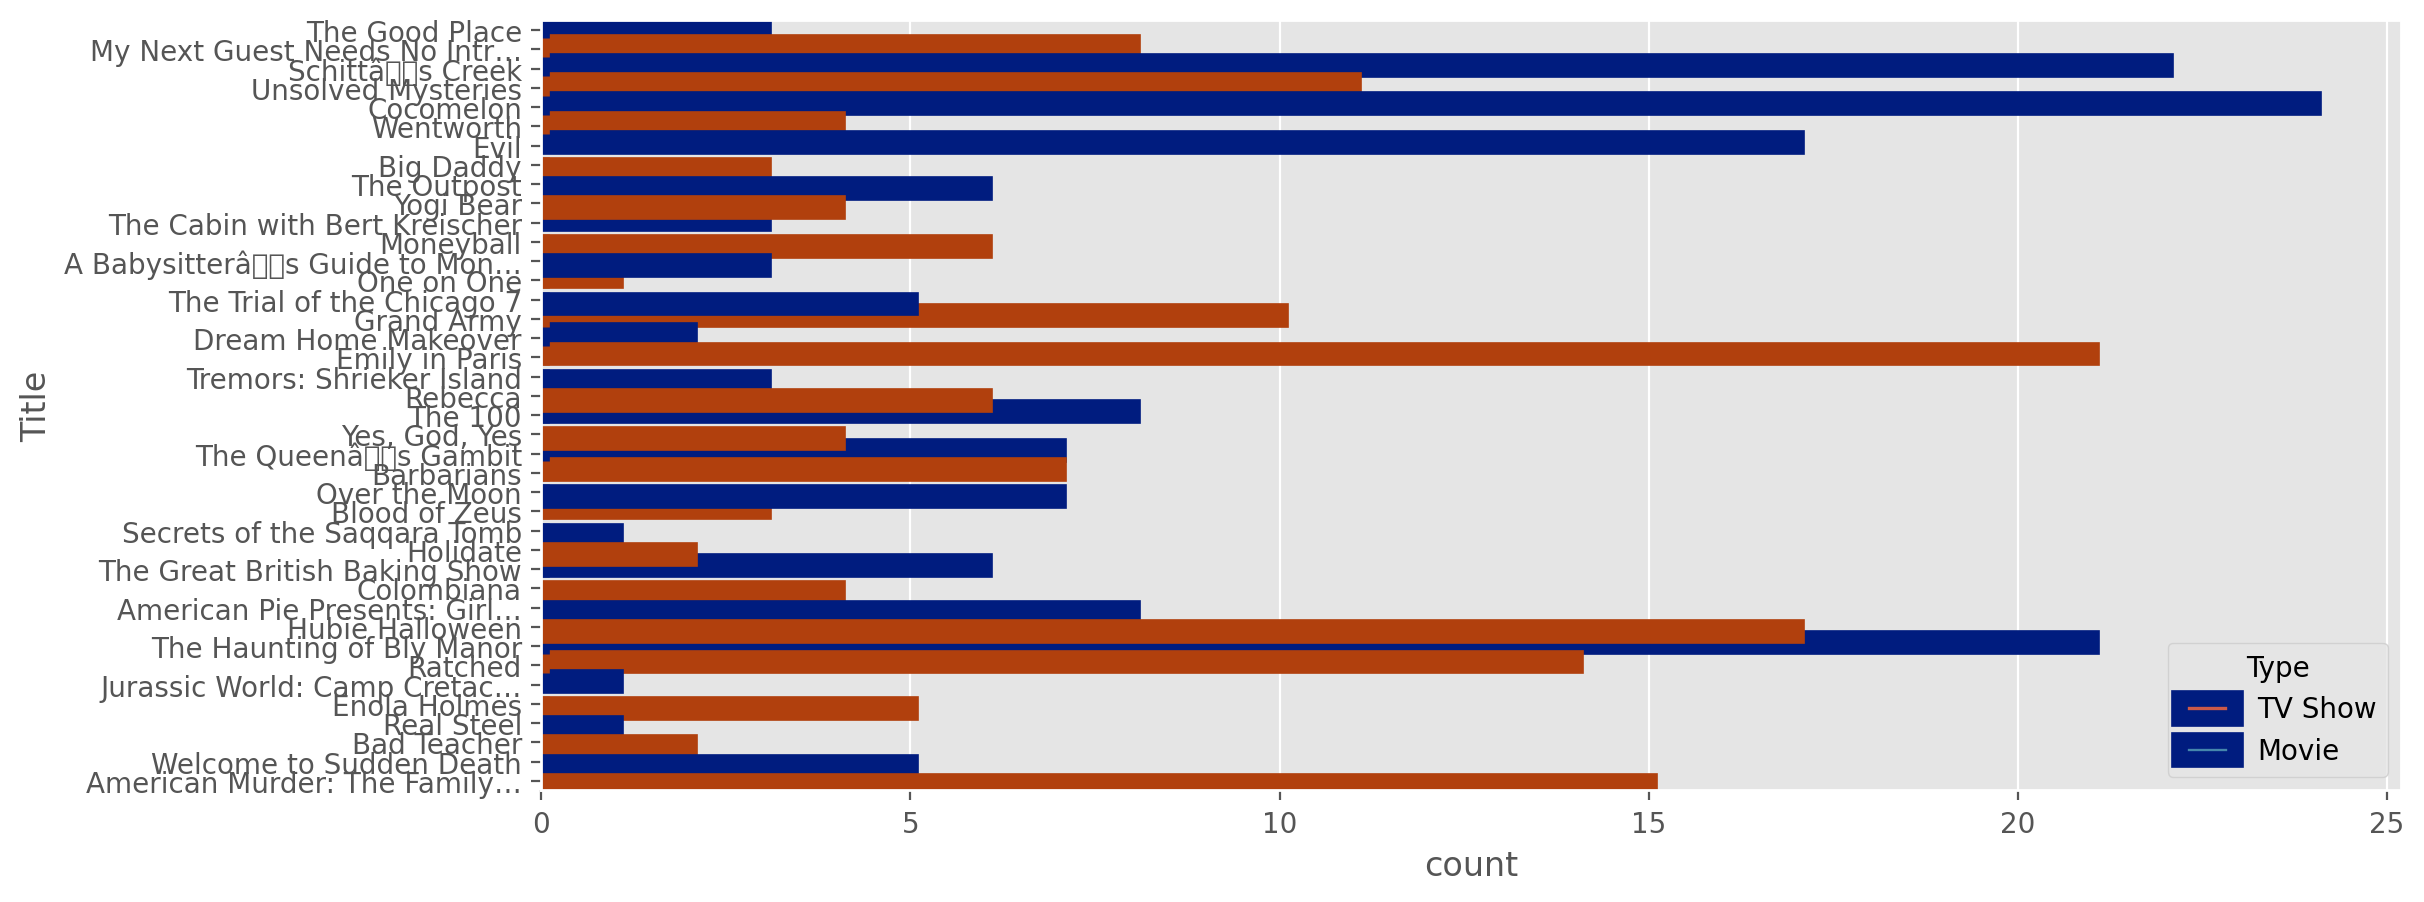

In [31]:
plt.figure(figsize=(12, 5), dpi=200)
sns.countplot(y='Title', hue='Type', data=filtered_data, linewidth=6, edgecolor=sns.color_palette("dark", 2), dodge=True)


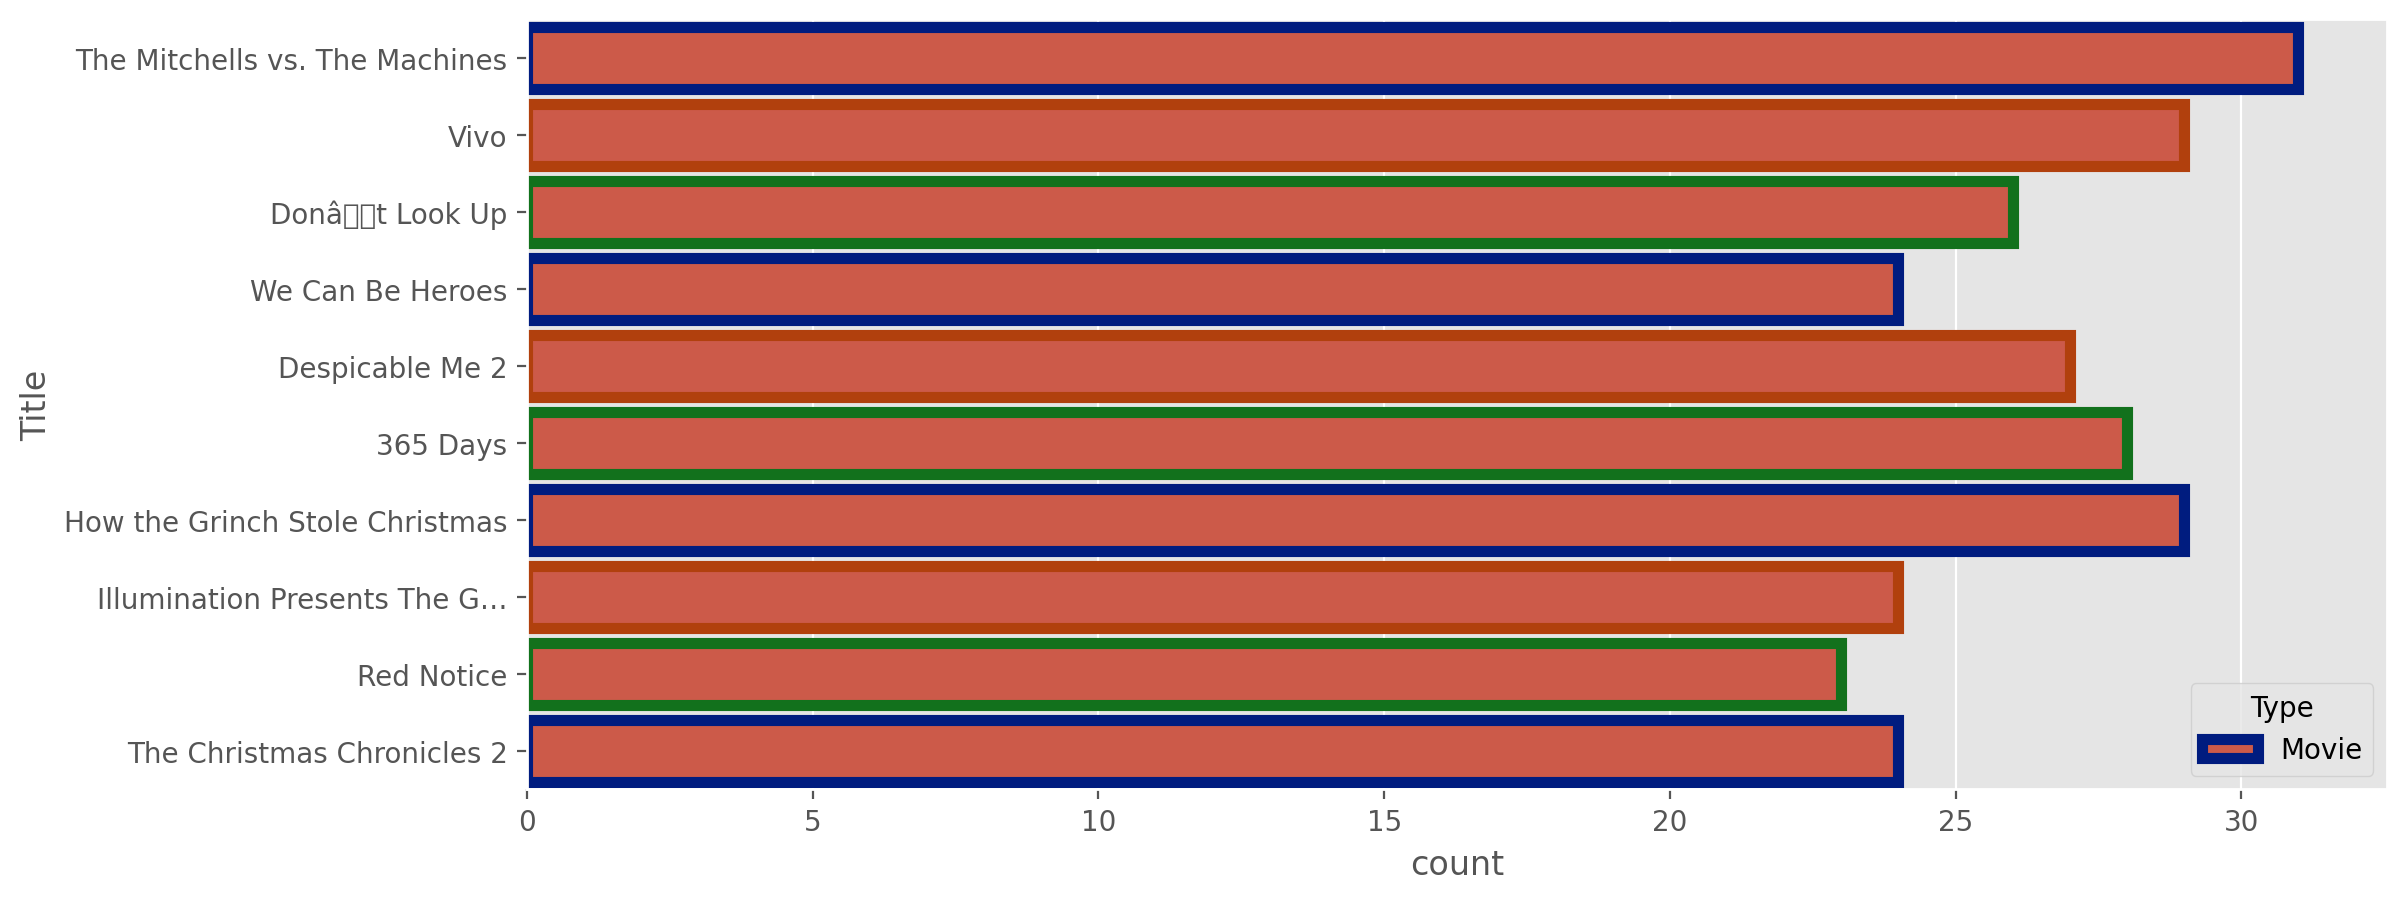

In [32]:
# filtered data by movie type
netflix['Date'] = pd.to_datetime(netflix['As of'])
start_date, end_date = '2020-01-01', '2022-12-31'
filtered_data = netflix[(netflix['Date'] >= start_date) & (netflix['Date'] <= end_date)]

selected_type = 'Movie'
filtered_data = filtered_data[filtered_data['Type'] == selected_type]


top_10_movies = filtered_data['Title'].value_counts().head(10).index
filtered_data = filtered_data[filtered_data['Title'].isin(top_10_movies)]

plt.figure(figsize=(12, 5), dpi=200)
sns.countplot(y='Title', hue='Type', data=filtered_data, linewidth=4, edgecolor=sns.color_palette("dark", 3))
plt.show()




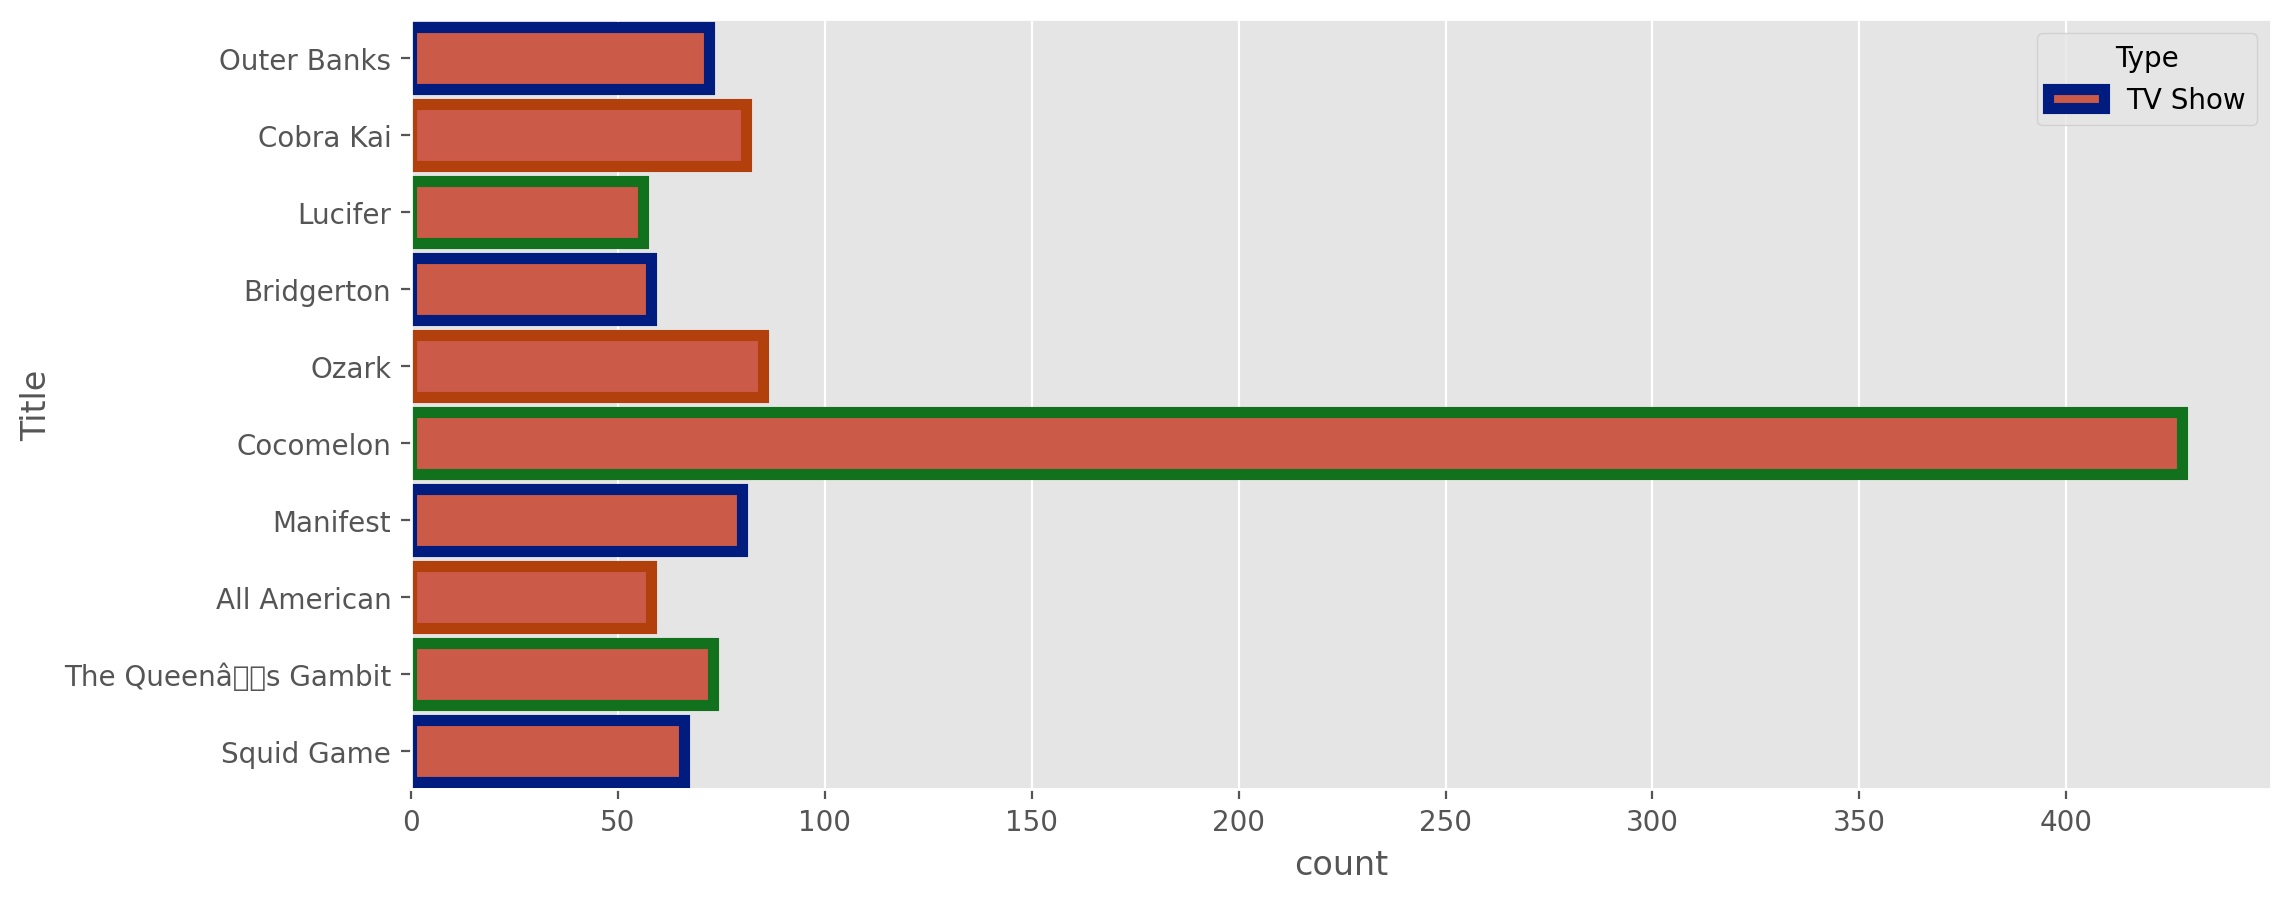

In [33]:
# filtered data by movie type
netflix['Date'] = pd.to_datetime(netflix['As of'])
start_date, end_date = '2020-01-01', '2022-12-31'
filtered_data = netflix[(netflix['Date'] >= start_date) & (netflix['Date'] <= end_date)]

selected_type = 'TV Show'
filtered_data = filtered_data[filtered_data['Type'] == selected_type]


top_10_movies = filtered_data['Title'].value_counts().head(10).index
filtered_data = filtered_data[filtered_data['Title'].isin(top_10_movies)]

plt.figure(figsize=(12, 5), dpi=200)
sns.countplot(y='Title', hue='Type', data=filtered_data, linewidth=4, edgecolor=sns.color_palette("dark", 3))
plt.show()




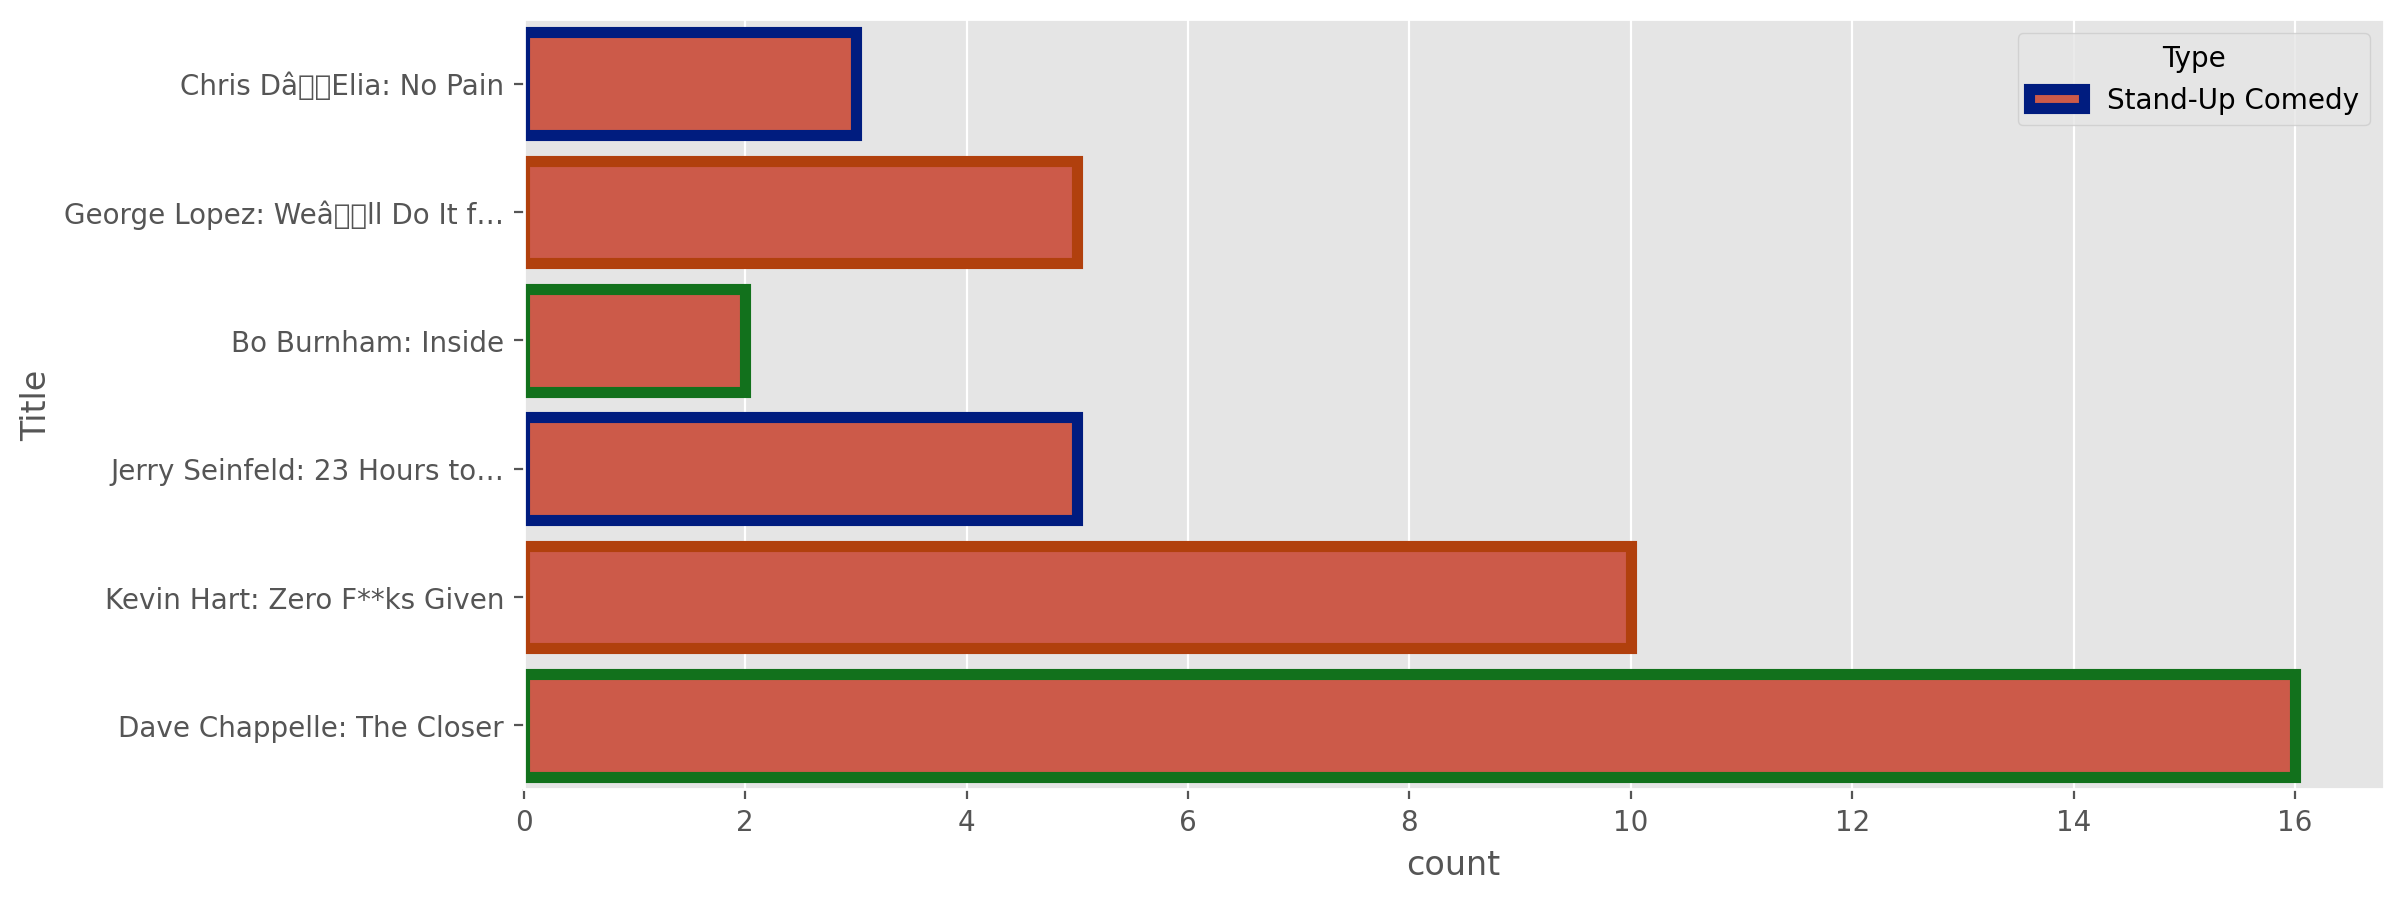

In [34]:

# filtered data by movie type
netflix['Date'] = pd.to_datetime(netflix['As of'])
start_date, end_date = '2020-01-01', '2022-12-31'
filtered_data = netflix[(netflix['Date'] >= start_date) & (netflix['Date'] <= end_date)]


filtered_data = filtered_data[filtered_data['Type'] == 'Stand-Up Comedy']


top_10_movies = filtered_data['Title'].value_counts().head(10).index
filtered_data = filtered_data[filtered_data['Title'].isin(top_10_movies)]

plt.figure(figsize=(12, 5), dpi=200)
sns.countplot(y='Title', hue='Type', data=filtered_data, linewidth=4, edgecolor=sns.color_palette("dark", 3))
plt.show()




In [35]:
netflix.Type.value_counts()

TV Show            4446
Movie              2611
Stand-Up Comedy      41
Concert/Perf…         2
Name: Type, dtype: int64

In [36]:
netflix['Type'][0]

'TV Show'

In [37]:
viewership_score = netflix.groupby('Type')['Viewership Score'].value_counts()
viewership_score

Type           Viewership Score
Concert/Perf…  9                    1
               15                   1
Movie          8                   79
               10                  74
               20                  72
                                   ..
TV Show        1466                 1
               1469                 1
               1471                 1
               1472                 1
               1474                 1
Name: Viewership Score, Length: 1001, dtype: int64

In [38]:
viewership_score = netflix['Type'].value_counts(normalize=True)

print("Percentage of TV show viewers               : {:.5f}".format(viewership_score.get('TV Show', 0) * 100))
print("Percentage of Movie viewers                 : {:.5f}".format(viewership_score.get('Movie', 0) * 100))
print("Percentage of Stand-Up Comedy viewers       : {:.5f}".format(viewership_score.get('Stand-Up Comedy', 0) * 100))
print("Percentage of Concert/Performance viewers   : {:.5f}".format(viewership_score.get('Concert/Performance', 0) * 100))


Percentage of TV show viewers               : 62.61972
Percentage of Movie viewers                 : 36.77465
Percentage of Stand-Up Comedy viewers       : 0.57746
Percentage of Concert/Performance viewers   : 0.00000


<Axes: xlabel='Type', ylabel='Viewership Score'>

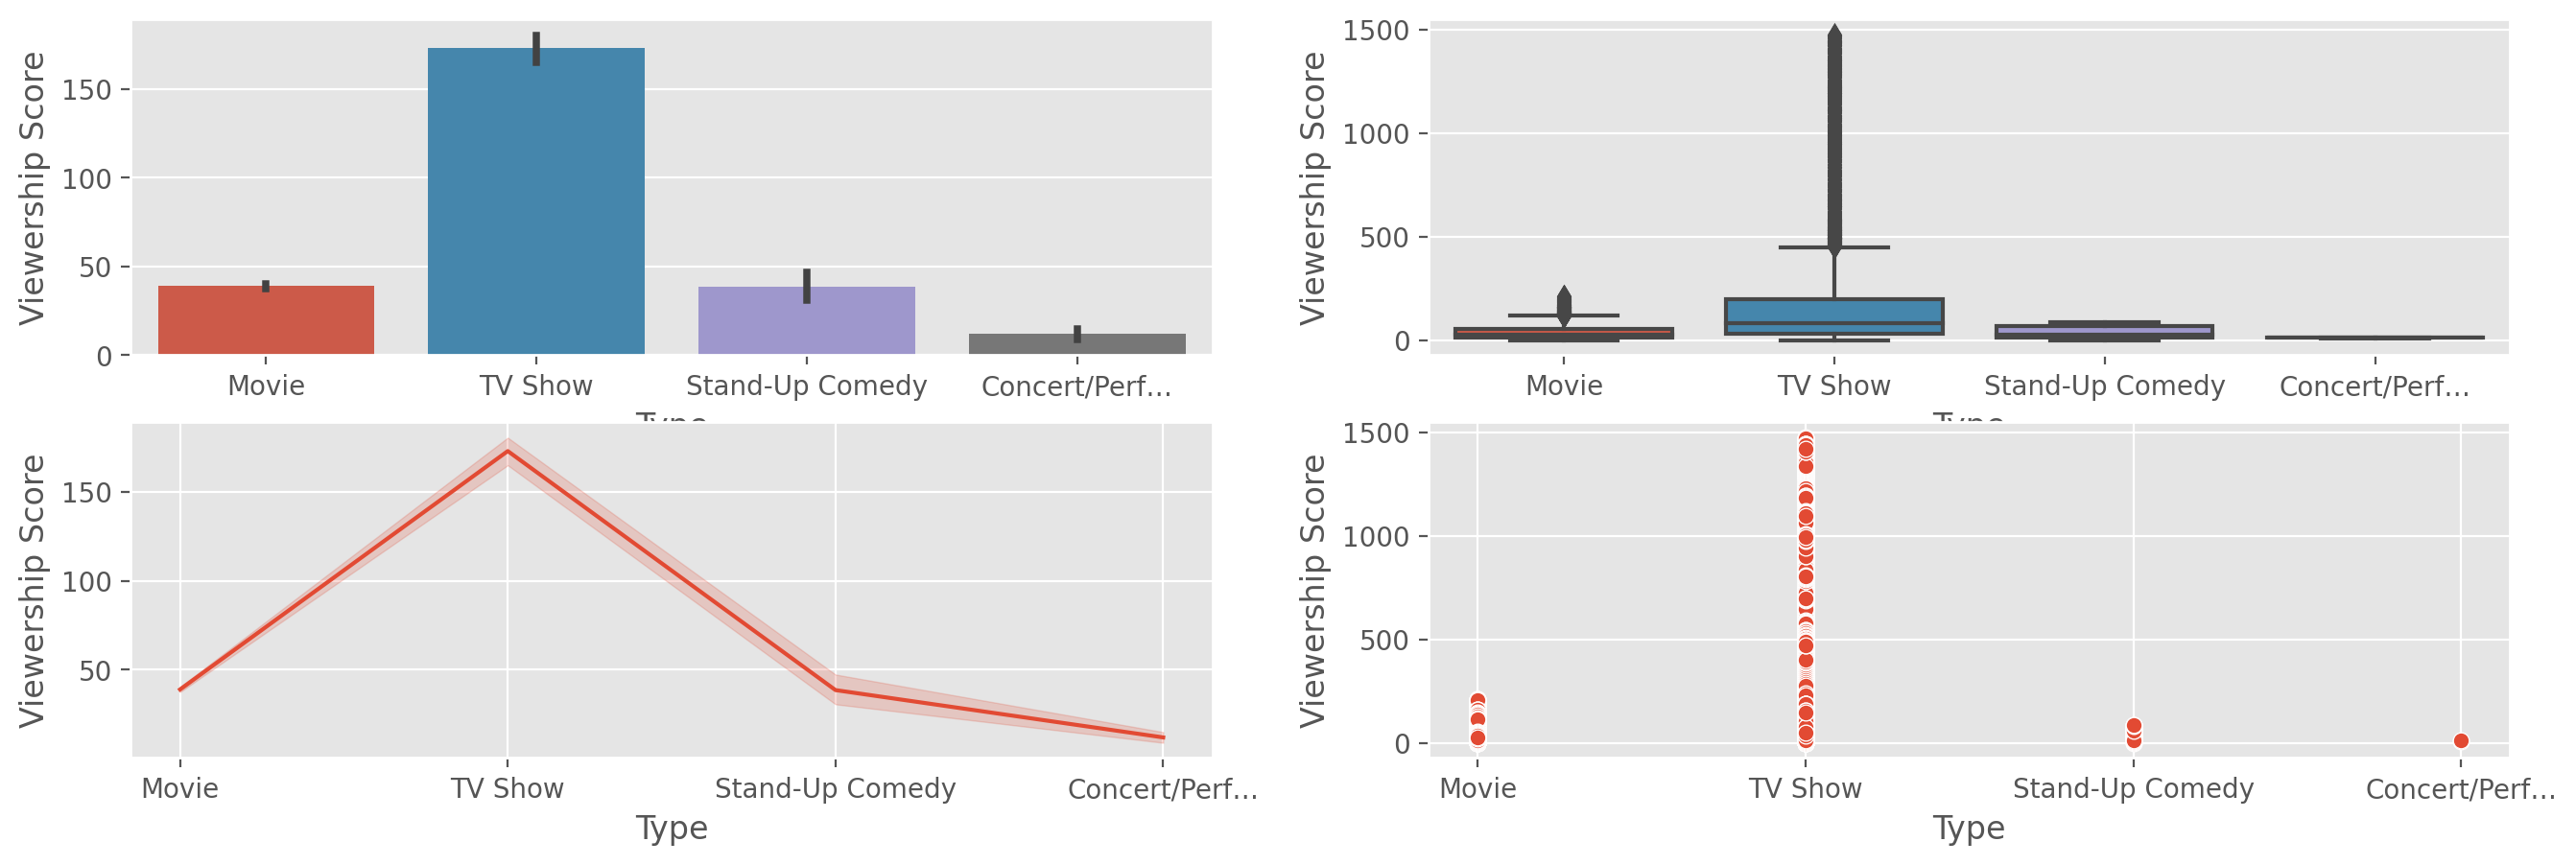

In [39]:
#Type vs Viewership score
plt.figure(figsize = (16,5), dpi =200)
plt.subplot(2,2,1)
sns.barplot(x ='Type', y = 'Viewership Score', data=netflix)
plt.subplot(2,2,2)
sns.boxplot(x ='Type', y = 'Viewership Score', data=netflix)
plt.subplot(2,2,3)
sns.lineplot(x ='Type', y = 'Viewership Score', data=netflix)
plt.subplot(2,2,4)
sns.scatterplot(x ='Type', y = 'Viewership Score', data=netflix)

In [40]:
viewership_score = netflix['Type'].value_counts(normalize=True)

TVshow_rating = viewership_score.get('TV Show', 0) * 100
Movie_rating = viewership_score.get('Movie', 0) * 100
StandUp_Comedy_rating = viewership_score.get('Stand-Up Comedy', 0) * 100
Concert_Performance_rating = viewership_score.get('Concert/Performance', 0) * 100


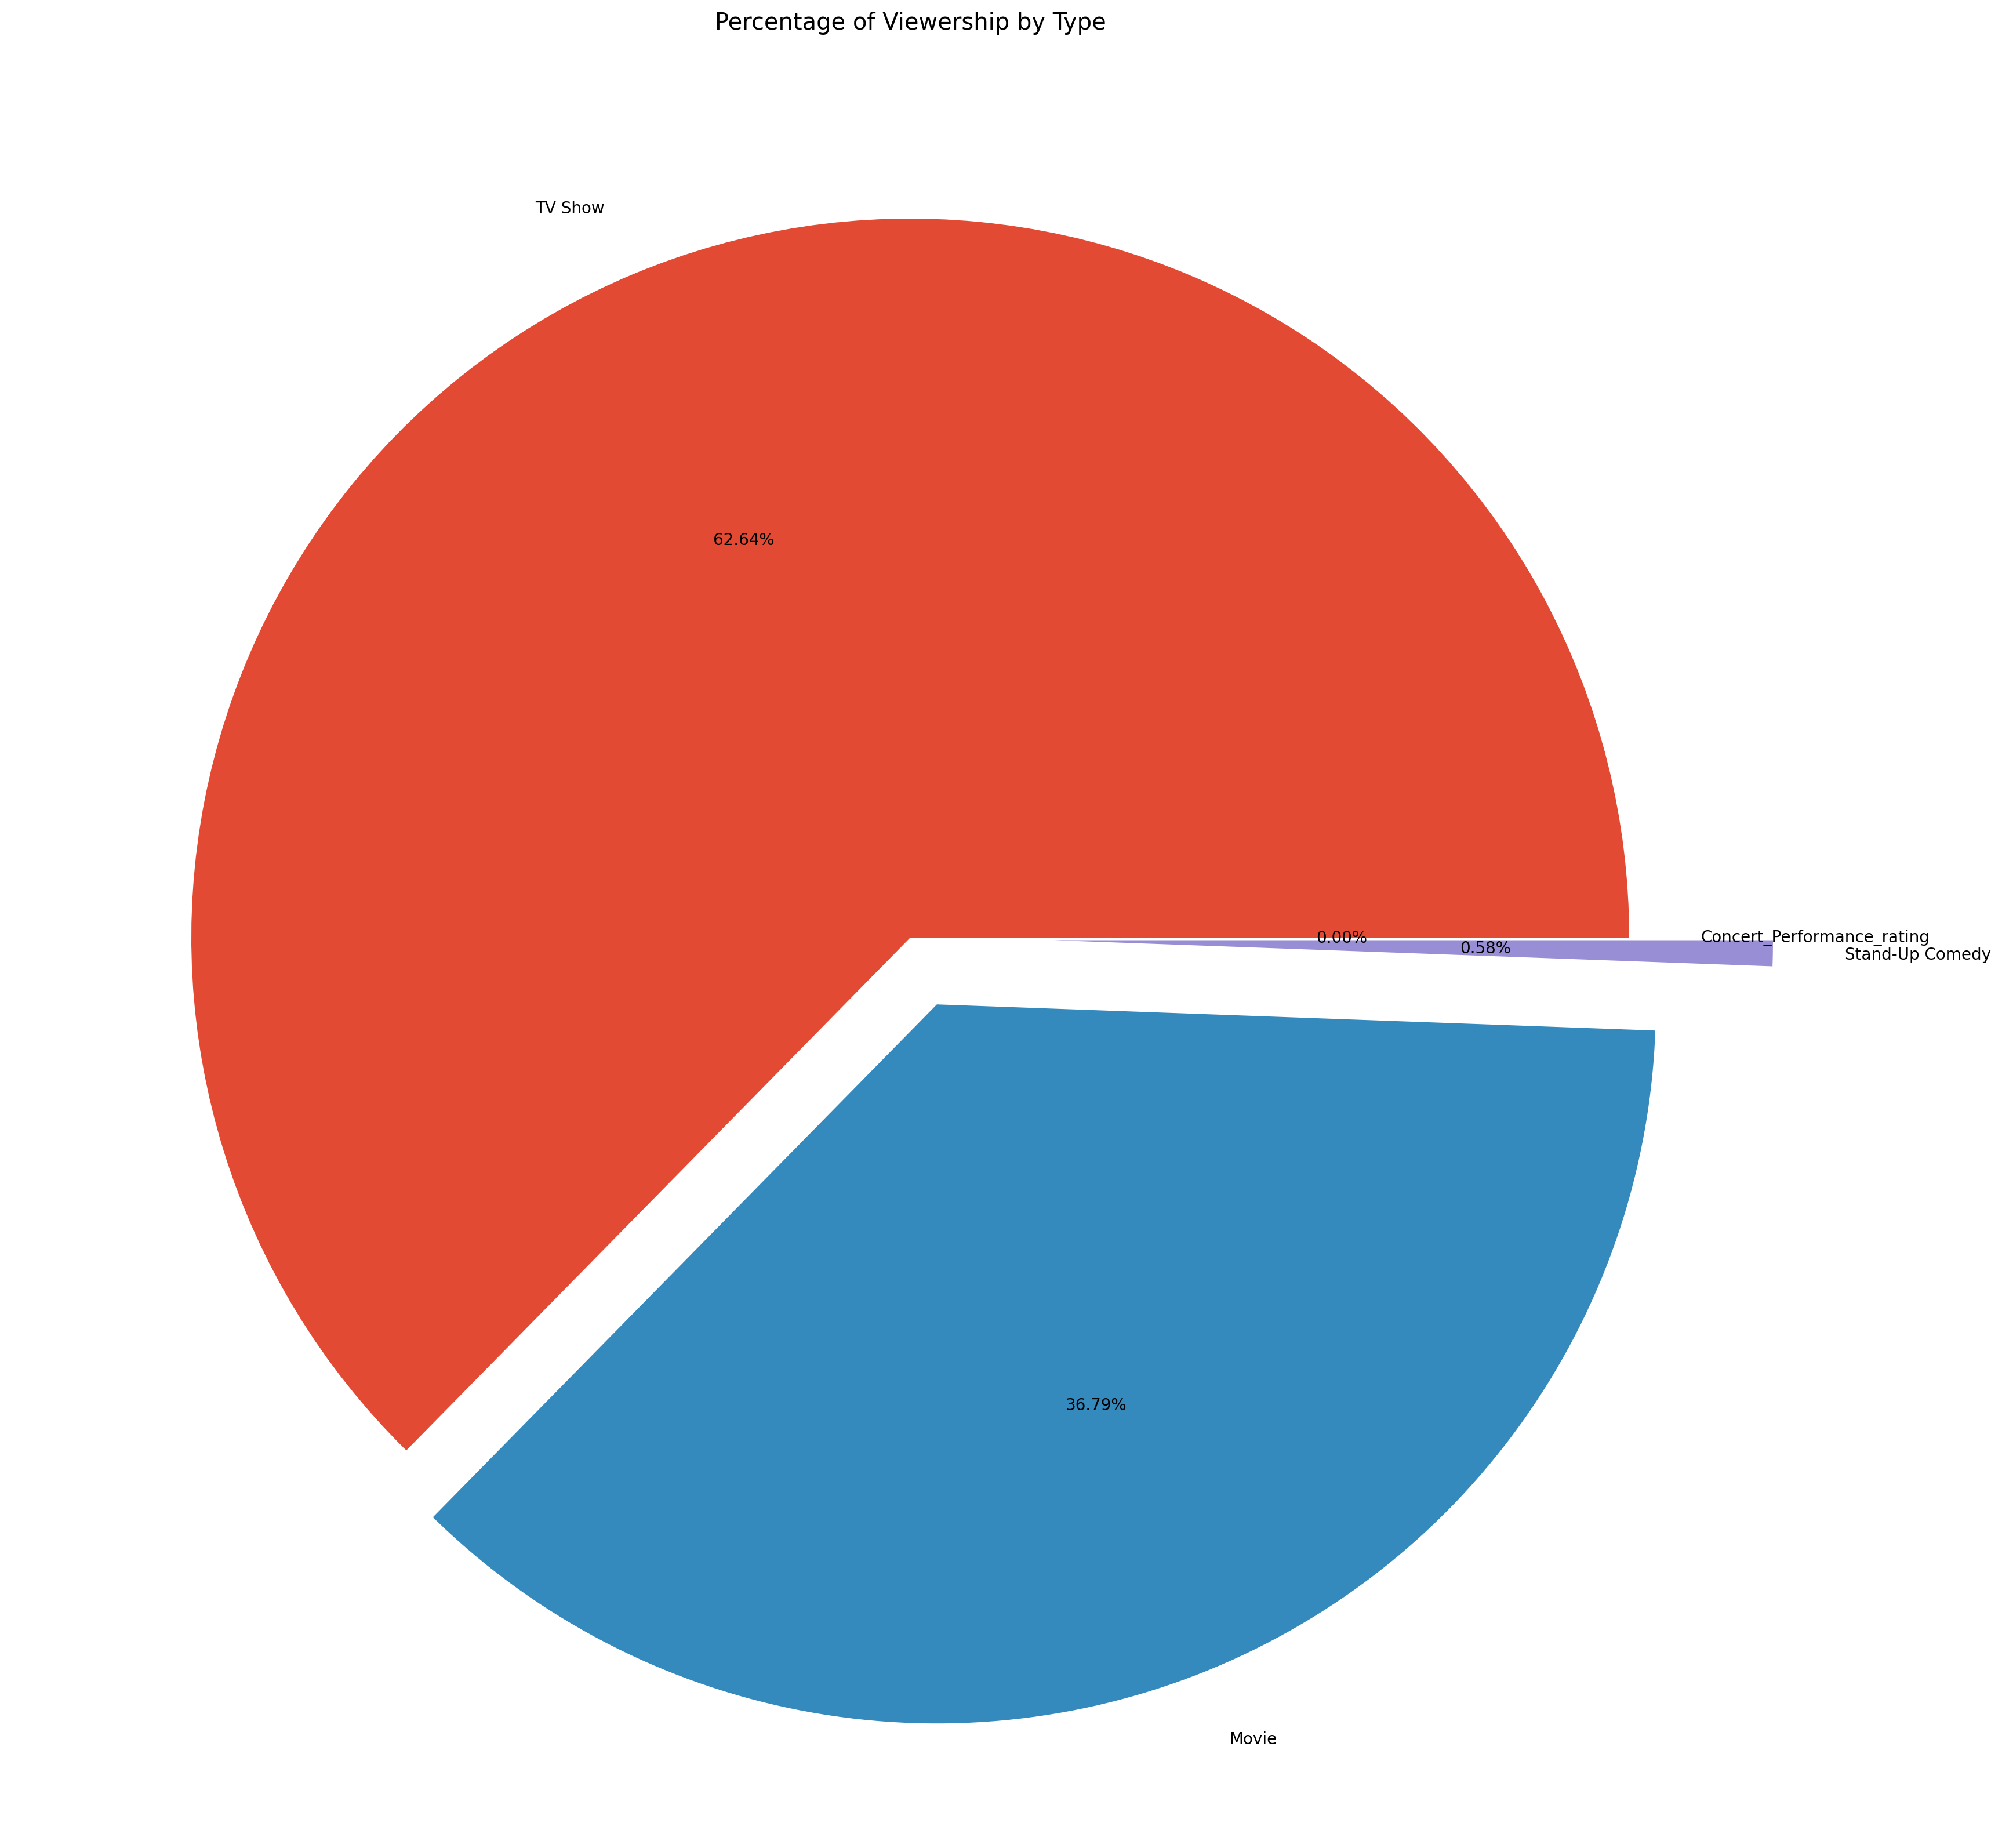

In [41]:
percentage_values = [TVshow_rating, Movie_rating, StandUp_Comedy_rating, Concert_Performance_rating]

labels = ['TV Show', 'Movie', 'Stand-Up Comedy', 'Concert_Performance_rating']

plt.figure(figsize=(20, 30), dpi=200)
plt.pie(percentage_values, labels=labels, autopct='%1.2f%%', explode=(0, 0.1, 0.2, 0))
plt.title('Percentage of Viewership by Type')
plt.show()


In [42]:
netflix[netflix['Viewership Score'] > 300]

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Release Date,Days In Top 10,Viewership Score,Date
5023,2021-08-16,4,4,2,Outer Banks,TV Show,"Apr 15, 2020",59,453,2021-08-16
5040,2021-08-18,1,2,1,Outer Banks,TV Show,"Apr 15, 2020",61,472,2021-08-18
5050,2021-08-19,1,1,1,Outer Banks,TV Show,"Apr 15, 2020",62,482,2021-08-19
5126,2021-08-26,7,6,1,Outer Banks,TV Show,"Apr 15, 2020",69,526,2021-08-26
5031,2021-08-17,2,4,1,Outer Banks,TV Show,"Apr 15, 2020",60,462,2021-08-17
...,...,...,...,...,...,...,...,...,...,...
6009,2021-11-22,10,10,8,Squid Game,TV Show,"Sep 17, 2021",63,491,2021-11-22
6049,2021-11-26,10,5,10,Squid Game,TV Show,"Sep 17, 2021",64,492,2021-11-26
6059,2021-11-27,10,10,4,Squid Game,TV Show,"Sep 17, 2021",65,493,2021-11-27
5979,2021-11-19,10,8,6,Squid Game,TV Show,"Sep 17, 2021",61,489,2021-11-19


In [43]:

netflix['As of'] = pd.to_datetime(netflix['As of'])  


selected_records = netflix[(netflix['As of'] >= '2020-01-01') & (netflix['As of'] <= '2022-12-31')]

print(selected_records)


          As of  Rank  Year to Date Rank  Last Week Rank  \
6465 2022-01-07     6                  7               4   
6519 2022-01-12    10                  9               9   
6486 2022-01-09     7                  7               4   
6496 2022-01-10     7                  7               4   
6476 2022-01-08     7                  6               4   
...         ...   ...                ...             ...   
1674 2020-09-15     5                  5               4   
1665 2020-09-14     6                  7               4   
1673 2020-09-15     4                  6               4   
1708 2020-09-18     9                  8               4   
1683 2020-09-16     4                  4               4   

                             Title     Type Netflix Release Date  \
6465              The Longest Yard    Movie          Apr 1, 2015   
6519              The Longest Yard    Movie          Apr 1, 2015   
6486              The Longest Yard    Movie          Apr 1, 2015   
6496   

In [44]:
# Assuming 'Release Date' is the column containing date information
netflix['Netflix Release Date'] = pd.to_datetime(netflix['Netflix Release Date'])

# Filter records from 2020 to 2022
selected_records = netflix[(netflix['Netflix Release Date'].dt.year >= 2020) & (netflix['Netflix Release Date'].dt.year <= 2022)]

print(selected_records)

          As of  Rank  Year to Date Rank  Last Week Rank  \
36   2020-04-04     7                  6               4   
35   2020-04-04     6                  4               4   
47   2020-04-05     8                  7               4   
39   2020-04-04    10                  8               4   
28   2020-04-03     9                  5               4   
...         ...   ...                ...             ...   
1674 2020-09-15     5                  5               4   
1665 2020-09-14     6                  7               4   
1673 2020-09-15     4                  6               4   
1708 2020-09-18     9                  8               4   
1683 2020-09-16     4                  4               4   

                             Title     Type Netflix Release Date  \
36                    The Roommate    Movie           2020-04-01   
35       How to Fix a Drug Scandal  TV Show           2020-04-01   
47                    The Roommate    Movie           2020-04-01   
39     

In [45]:

#netflix['Netflix Release Date'] = pd.to_datetime(netflix['Netflix Release Date'])

# Filter records from 2020 to 2022 and select specific columns
selected_records = netflix[(netflix['Netflix Release Date'].dt.year >= 2020) & (netflix['Netflix Release Date'].dt.year <= 2022)][['Title', 'Type', 'Netflix Release Date', 'Viewership Score', 'Days In Top 10']]


print(selected_records.head(10))



                        Title     Type Netflix Release Date  Viewership Score  \
36               The Roommate    Movie           2020-04-01                13   
35  How to Fix a Drug Scandal  TV Show           2020-04-01                18   
47               The Roommate    Movie           2020-04-01                16   
39           The Players Club    Movie           2020-04-01                 4   
28                       Salt    Movie           2020-04-01                 2   
27           The Players Club    Movie           2020-04-01                 3   
45  How to Fix a Drug Scandal  TV Show           2020-04-01                23   
25               The Roommate    Movie           2020-04-01                 9   
56  How to Fix a Drug Scandal  TV Show           2020-04-01                27   
23  How to Fix a Drug Scandal  TV Show           2020-04-01                13   

    Days In Top 10  
36               3  
35               3  
47               4  
39               2  
28 

In [46]:
selected_records = netflix[(netflix['Netflix Release Date'].dt.year >= 2020) & (netflix['Netflix Release Date'].dt.year <= 2022)][['Title', 'Type', 'Netflix Release Date', 'Viewership Score', 'Days In Top 10']]
selected_records = selected_records.sort_values(by='Days In Top 10', ascending=False)
top_10_records = selected_records.head(10)

print(top_10_records)


          Title     Type Netflix Release Date  Viewership Score  \
6998  Cocomelon  TV Show           2020-06-01              1474   
6959  Cocomelon  TV Show           2020-06-01              1472   
6718  Cocomelon  TV Show           2020-06-01              1471   
6687  Cocomelon  TV Show           2020-06-01              1469   
6674  Cocomelon  TV Show           2020-06-01              1466   
6665  Cocomelon  TV Show           2020-06-01              1460   
6655  Cocomelon  TV Show           2020-06-01              1455   
6646  Cocomelon  TV Show           2020-06-01              1450   
6639  Cocomelon  TV Show           2020-06-01              1446   
6617  Cocomelon  TV Show           2020-06-01              1445   

      Days In Top 10  
6998             428  
6959             427  
6718             426  
6687             425  
6674             424  
6665             423  
6655             422  
6646             421  
6639             420  
6617             419  


In [47]:
viewership_score = netflix.groupby('Type')['Viewership Score'].value_counts()
viewership_score


Type           Viewership Score
Concert/Perf…  9                    1
               15                   1
Movie          8                   79
               10                  74
               20                  72
                                   ..
TV Show        1466                 1
               1469                 1
               1471                 1
               1472                 1
               1474                 1
Name: Viewership Score, Length: 1001, dtype: int64

In [48]:
netflix.groupby('Days In Top 10')['Viewership Score'].mean()

Days In Top 10
1         5.053968
2        11.321782
3        18.078712
4        24.690702
5        32.158120
          ...     
424    1466.000000
425    1469.000000
426    1471.000000
427    1472.000000
428    1474.000000
Name: Viewership Score, Length: 428, dtype: float64

<Axes: xlabel='Title', ylabel='Viewership Score'>

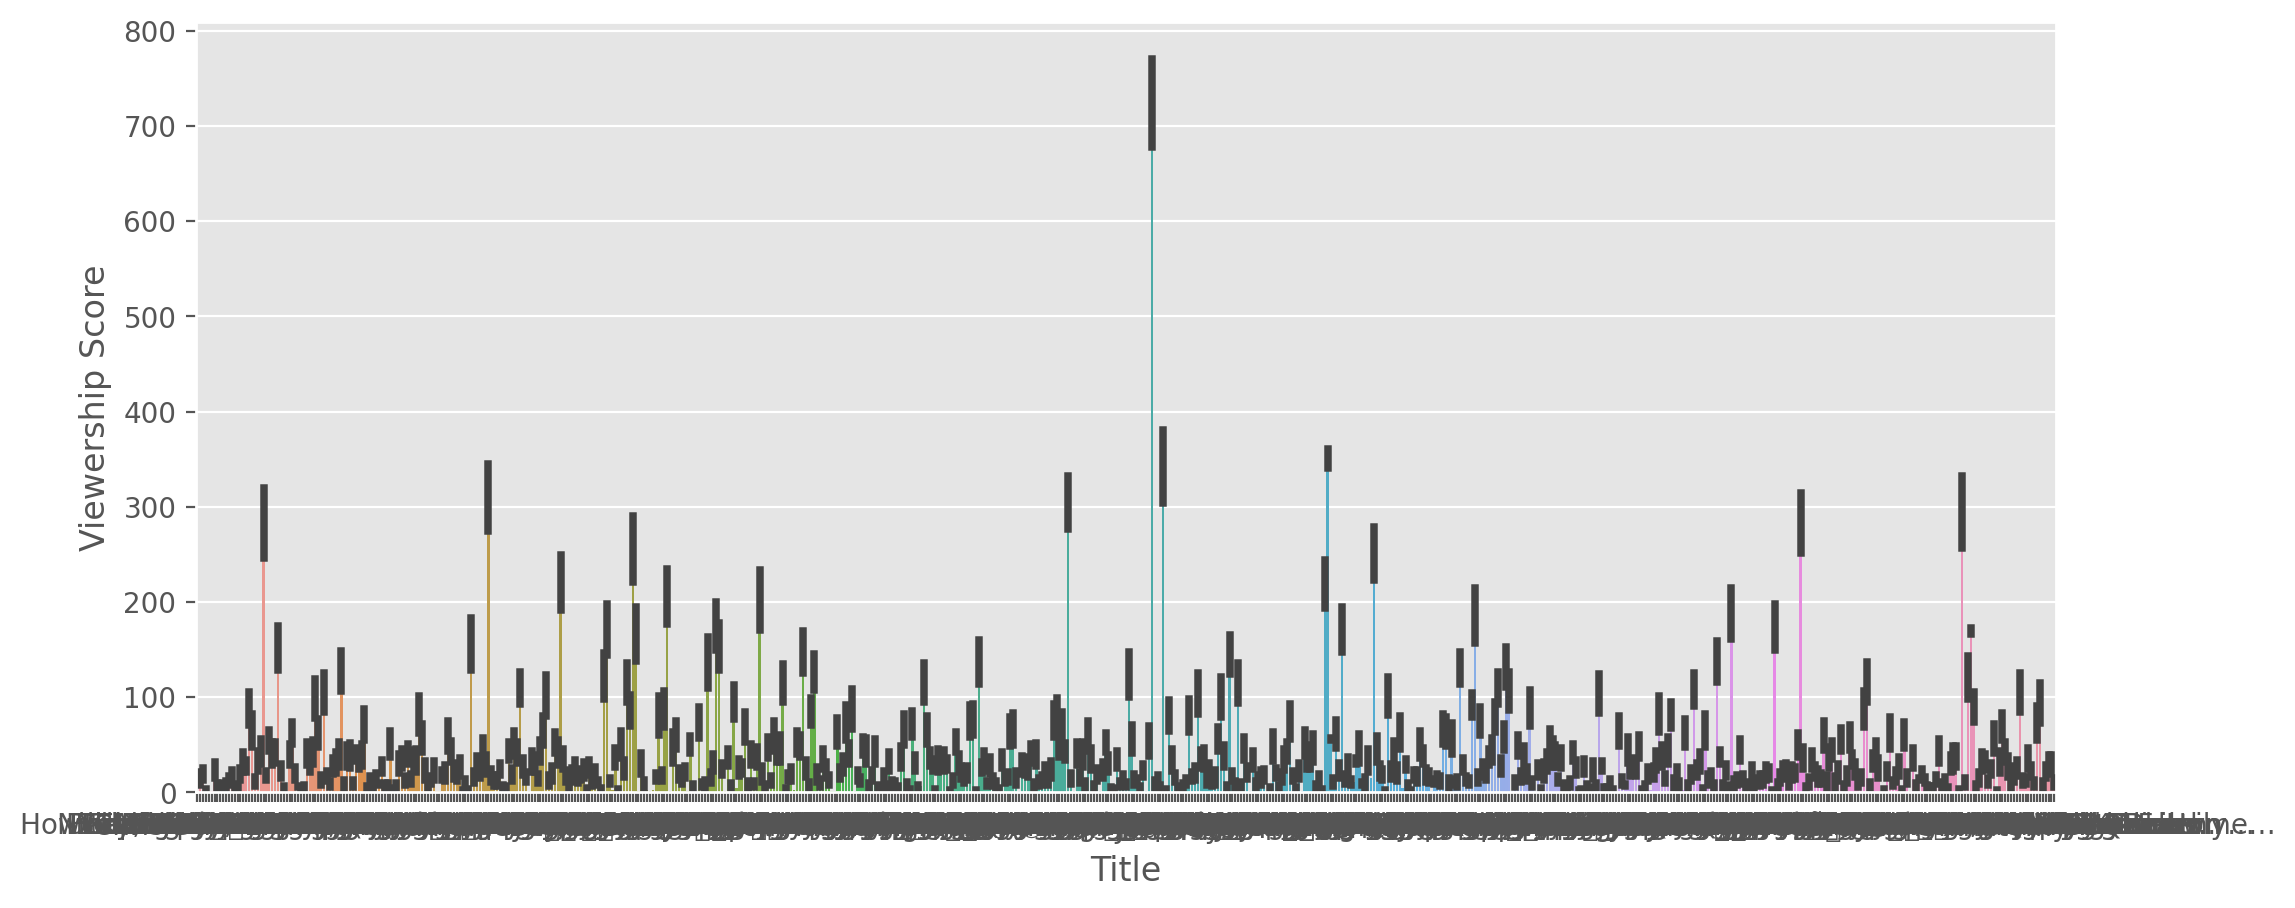

In [49]:
plt.figure(figsize = (12,5), dpi=200)
sns.barplot(x='Title', y='Viewership Score', data=netflix)


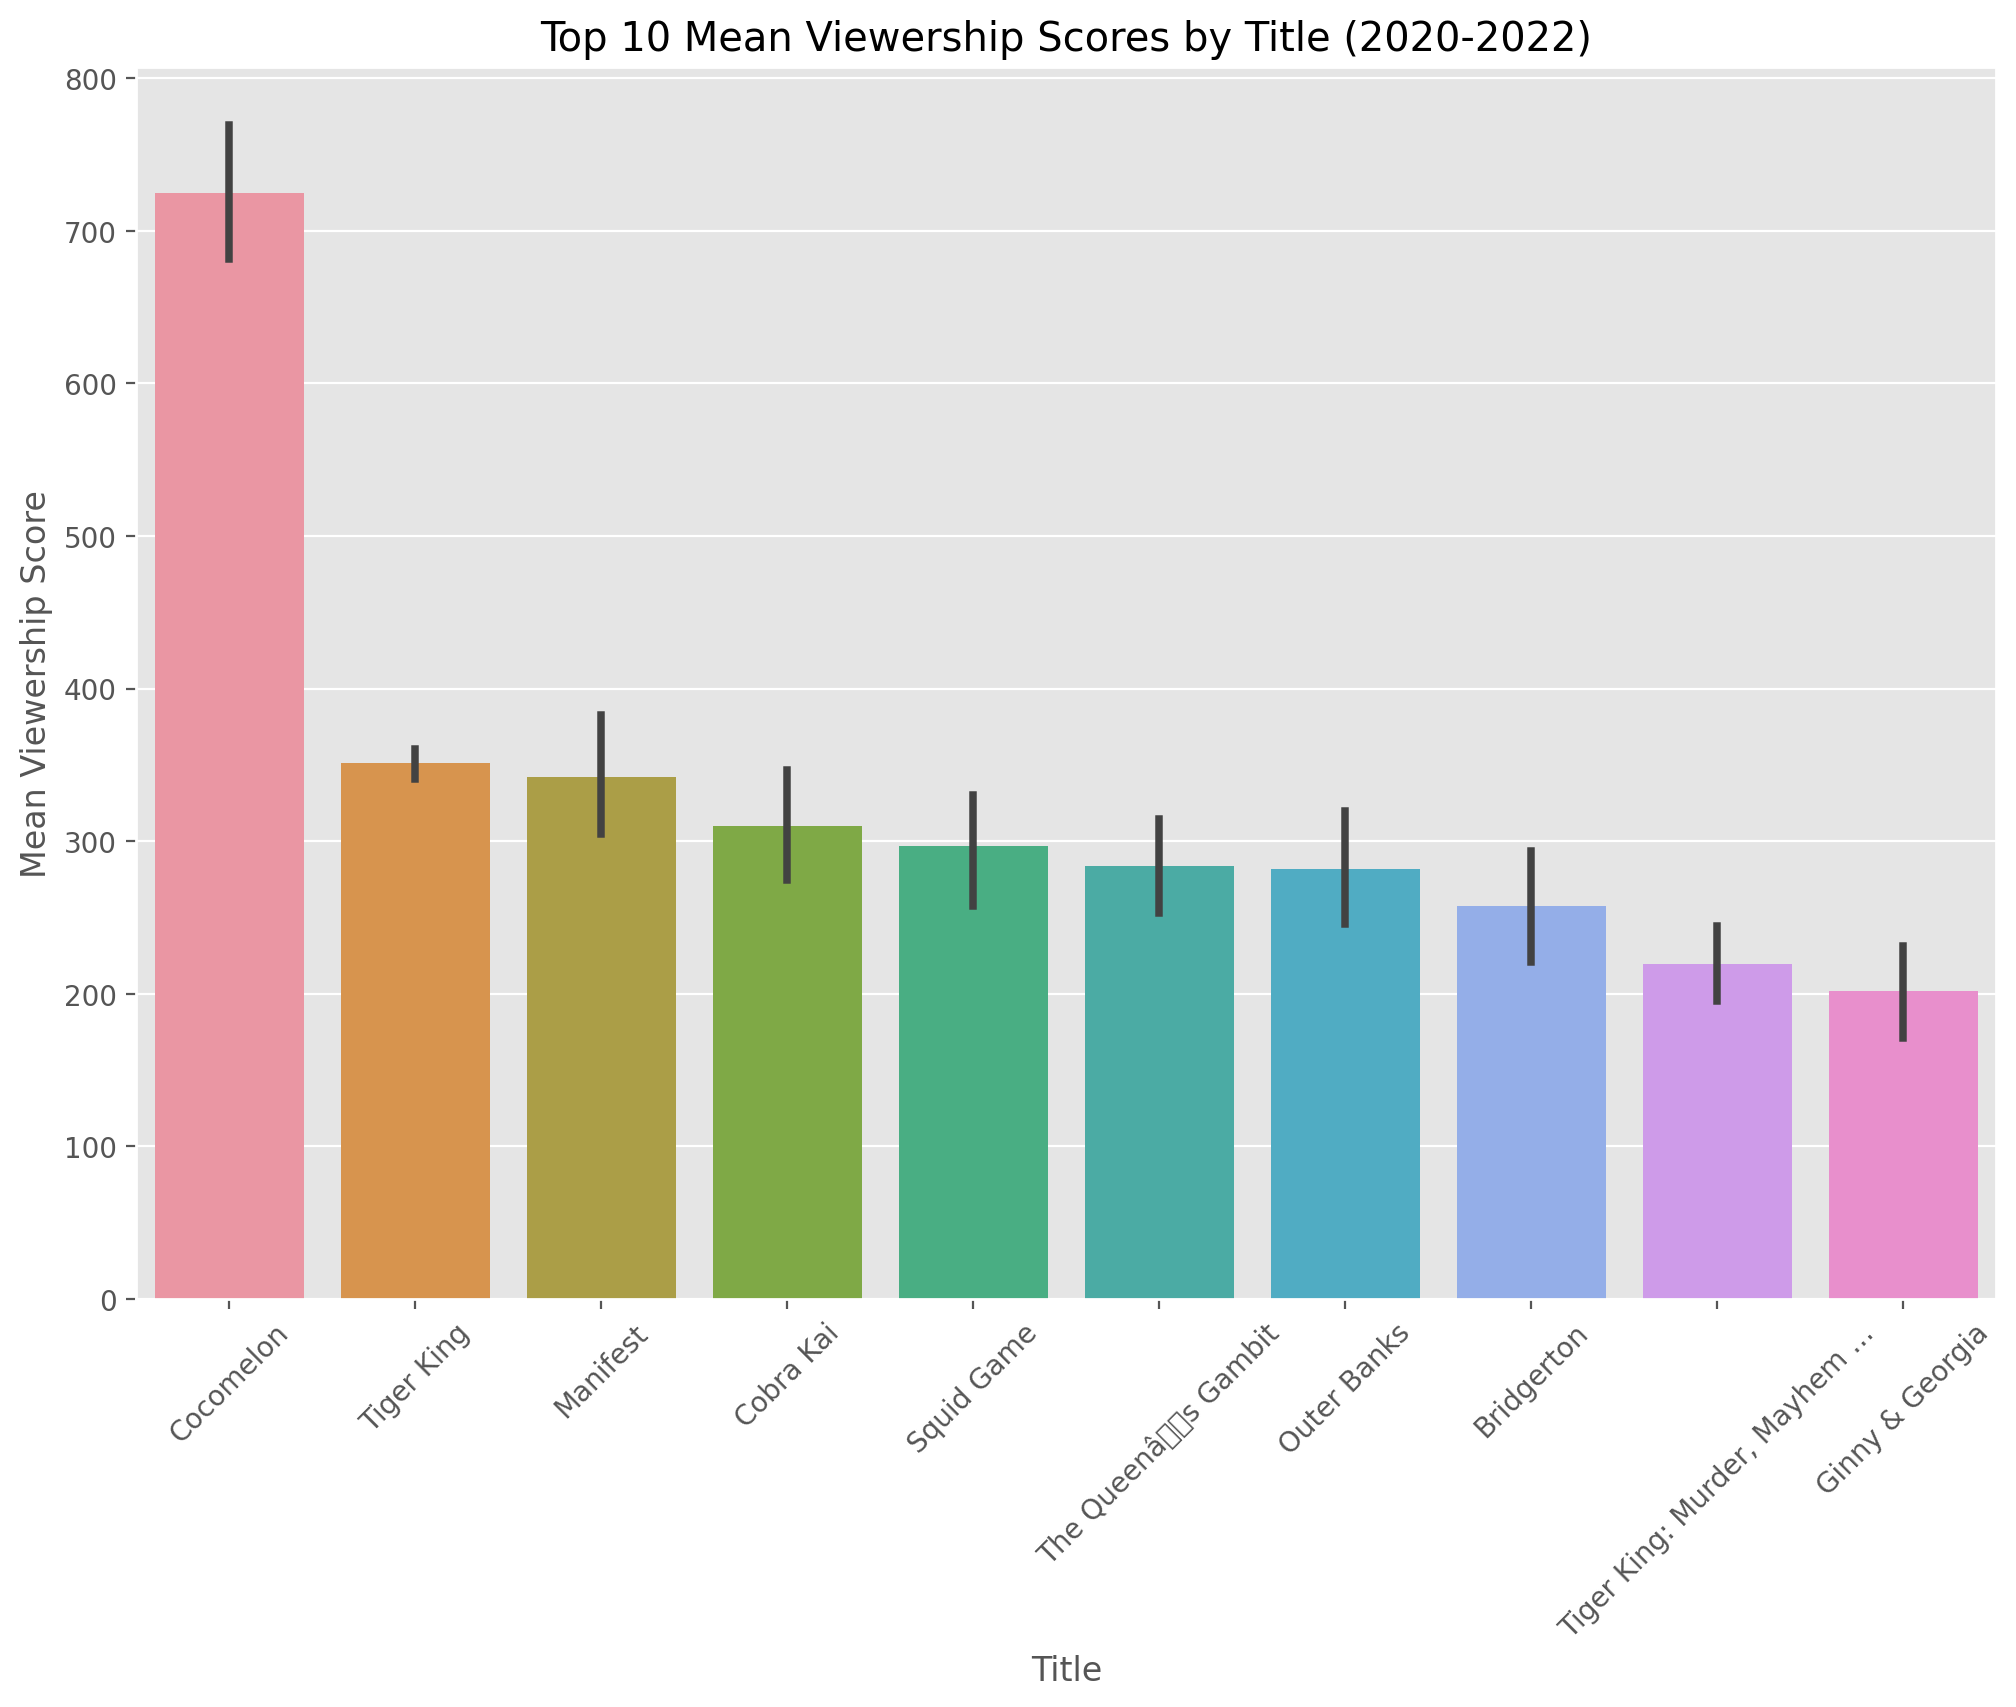

In [50]:
netflix['Netflix Release Date'] = pd.to_datetime(netflix['Netflix Release Date'])

# Filter records from 2020 to 2022
filtered_data = netflix[(netflix['Netflix Release Date'].dt.year >= 2020) & (netflix['Netflix Release Date'].dt.year <= 2022)]

# Group by 'Title' and calculate the mean of 'Viewership Score'
desc_order = filtered_data.groupby('Title')['Viewership Score'].mean().sort_values(ascending=False).head(10).index

# Create the bar plot
plt.figure(figsize=(12, 8), dpi=200)
sns.barplot(x='Title', y='Viewership Score', order=desc_order, data=filtered_data)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Top 10 Mean Viewership Scores by Title (2020-2022)')
plt.xlabel('Title')
plt.ylabel('Mean Viewership Score')
plt.show()


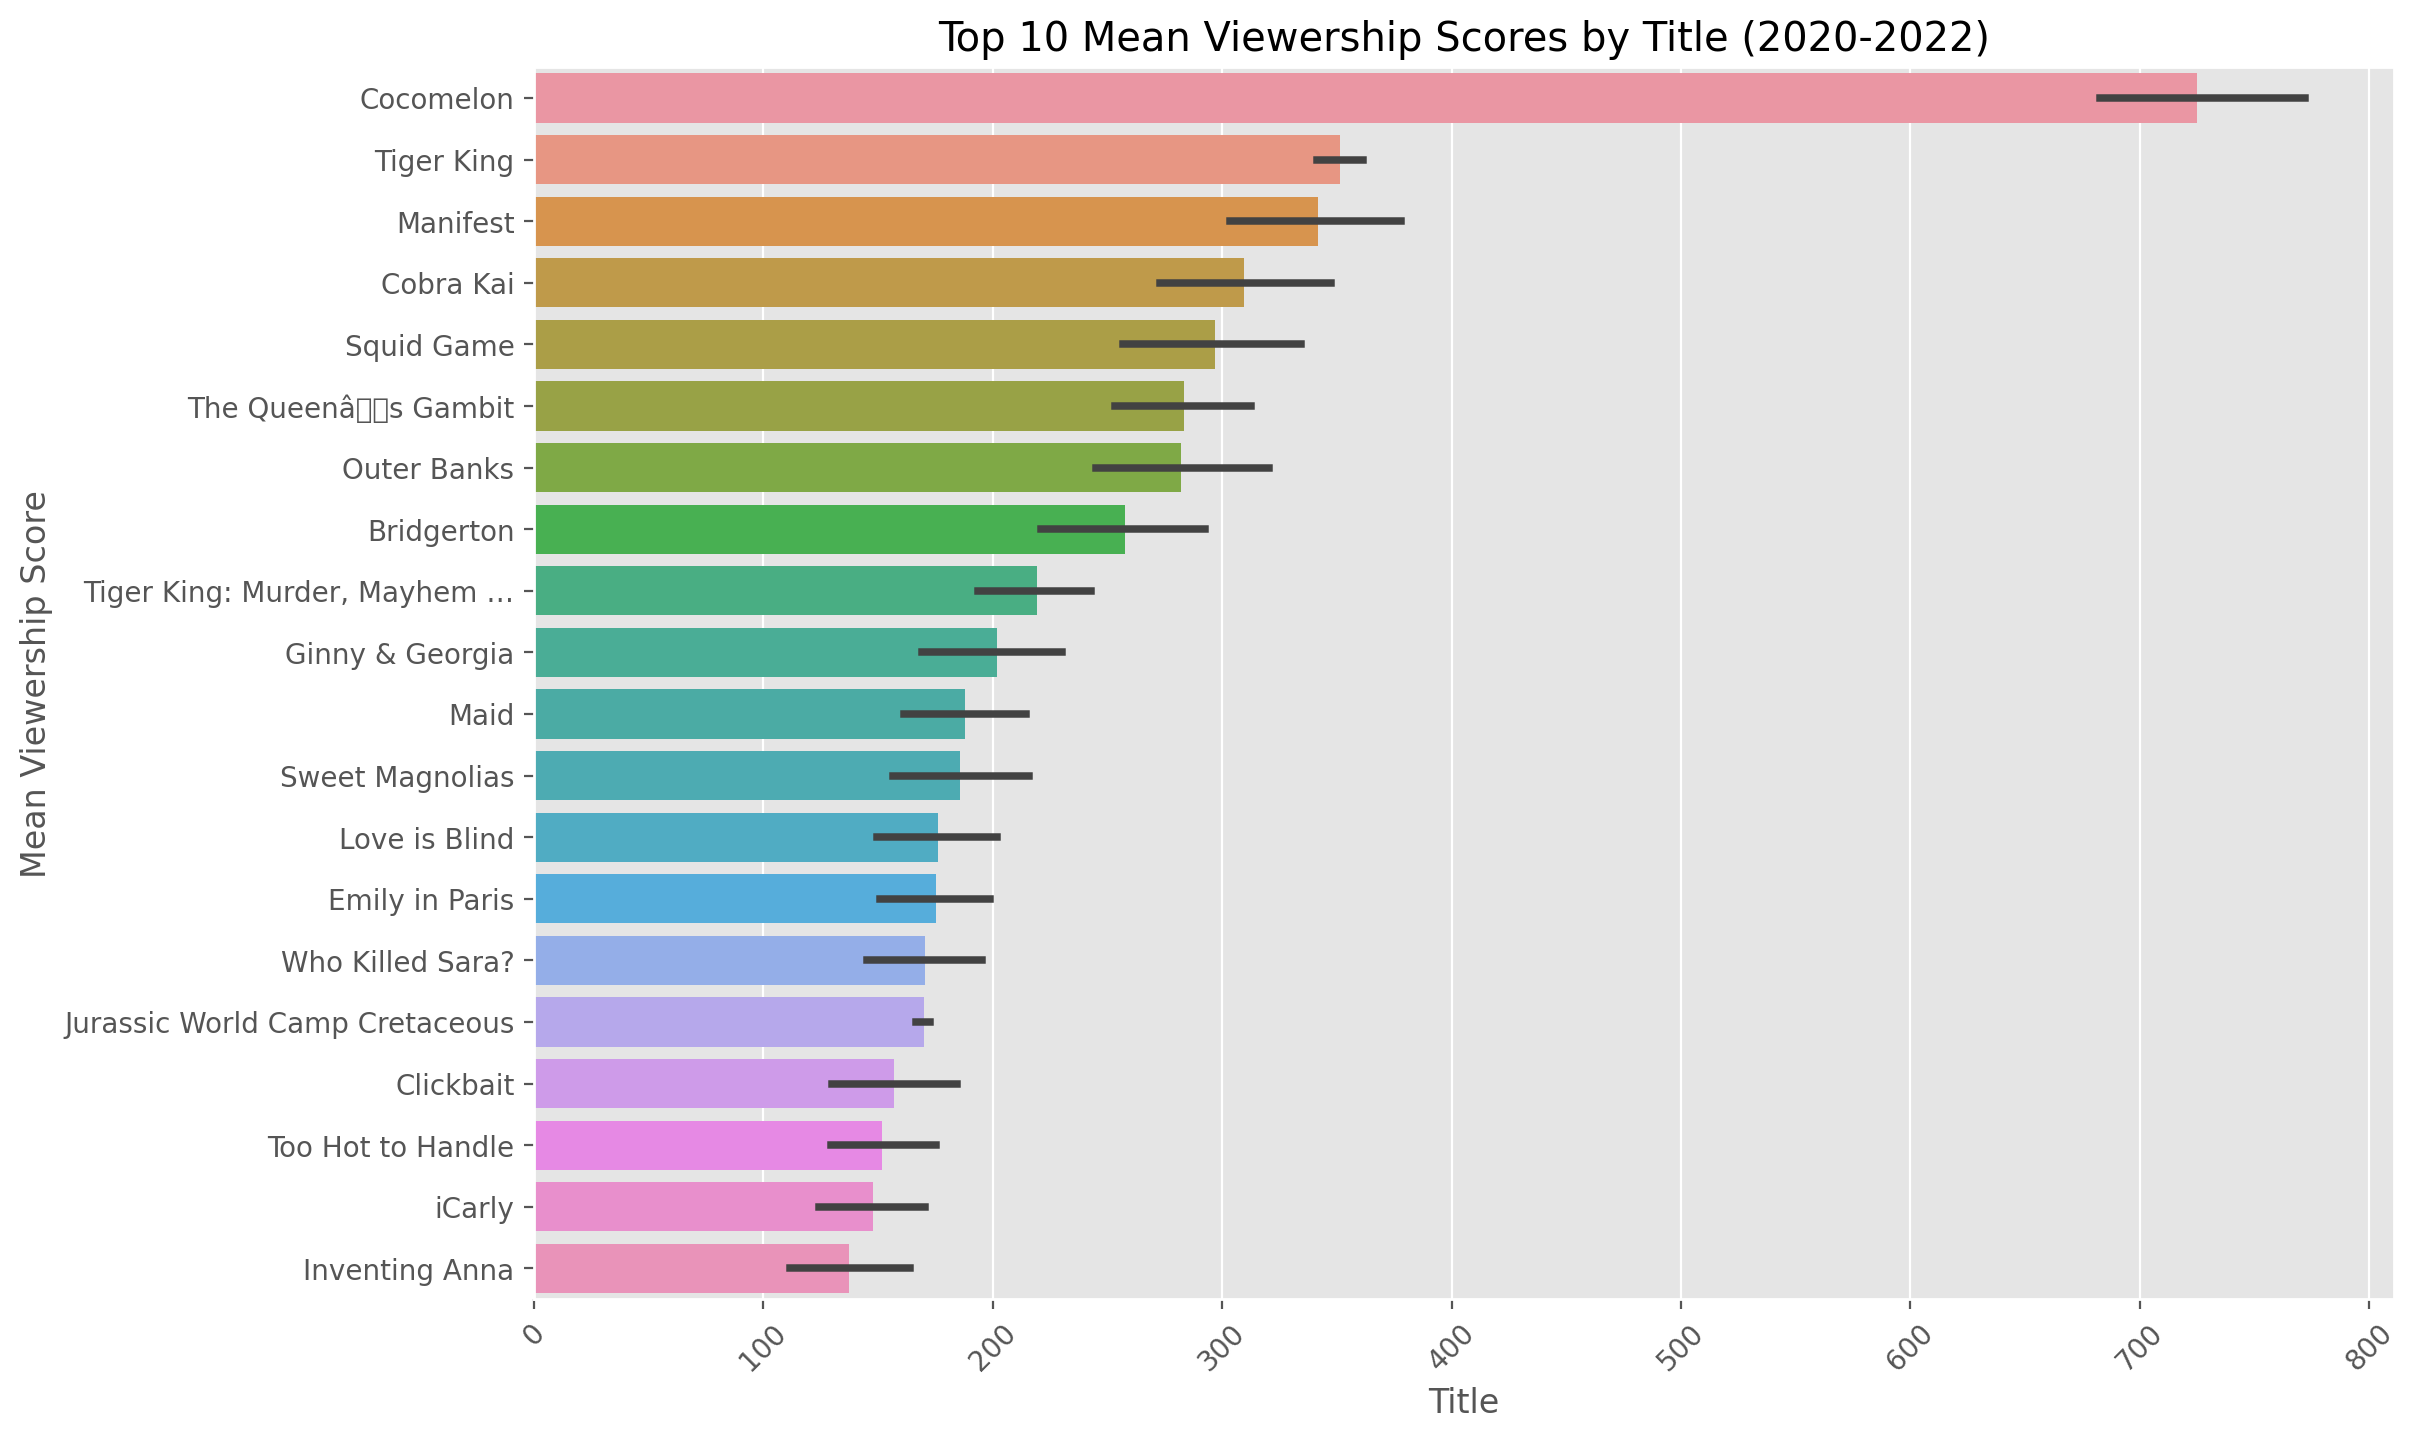

In [51]:
# Assuming 'Netflix Release Date' is the column representing the release date
netflix['Netflix Release Date'] = pd.to_datetime(netflix['Netflix Release Date'])

# Filter records from 2020 to 2022
filtered_data = netflix[(netflix['Netflix Release Date'].dt.year >= 2020) & (netflix['Netflix Release Date'].dt.year <= 2022)]

# Group by 'Title' and calculate the mean of 'Viewership Score'
desc_order = filtered_data.groupby('Title')['Viewership Score'].mean().sort_values(ascending=False).head(20).index

# Create the bar plot
plt.figure(figsize=(12, 8), dpi=200)
sns.barplot(y='Title', x='Viewership Score', order=desc_order, data=filtered_data)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Top 10 Mean Viewership Scores by Title (2020-2022)')
plt.xlabel('Title')
plt.ylabel('Mean Viewership Score')
plt.show()


<Axes: ylabel='Viewership Score'>

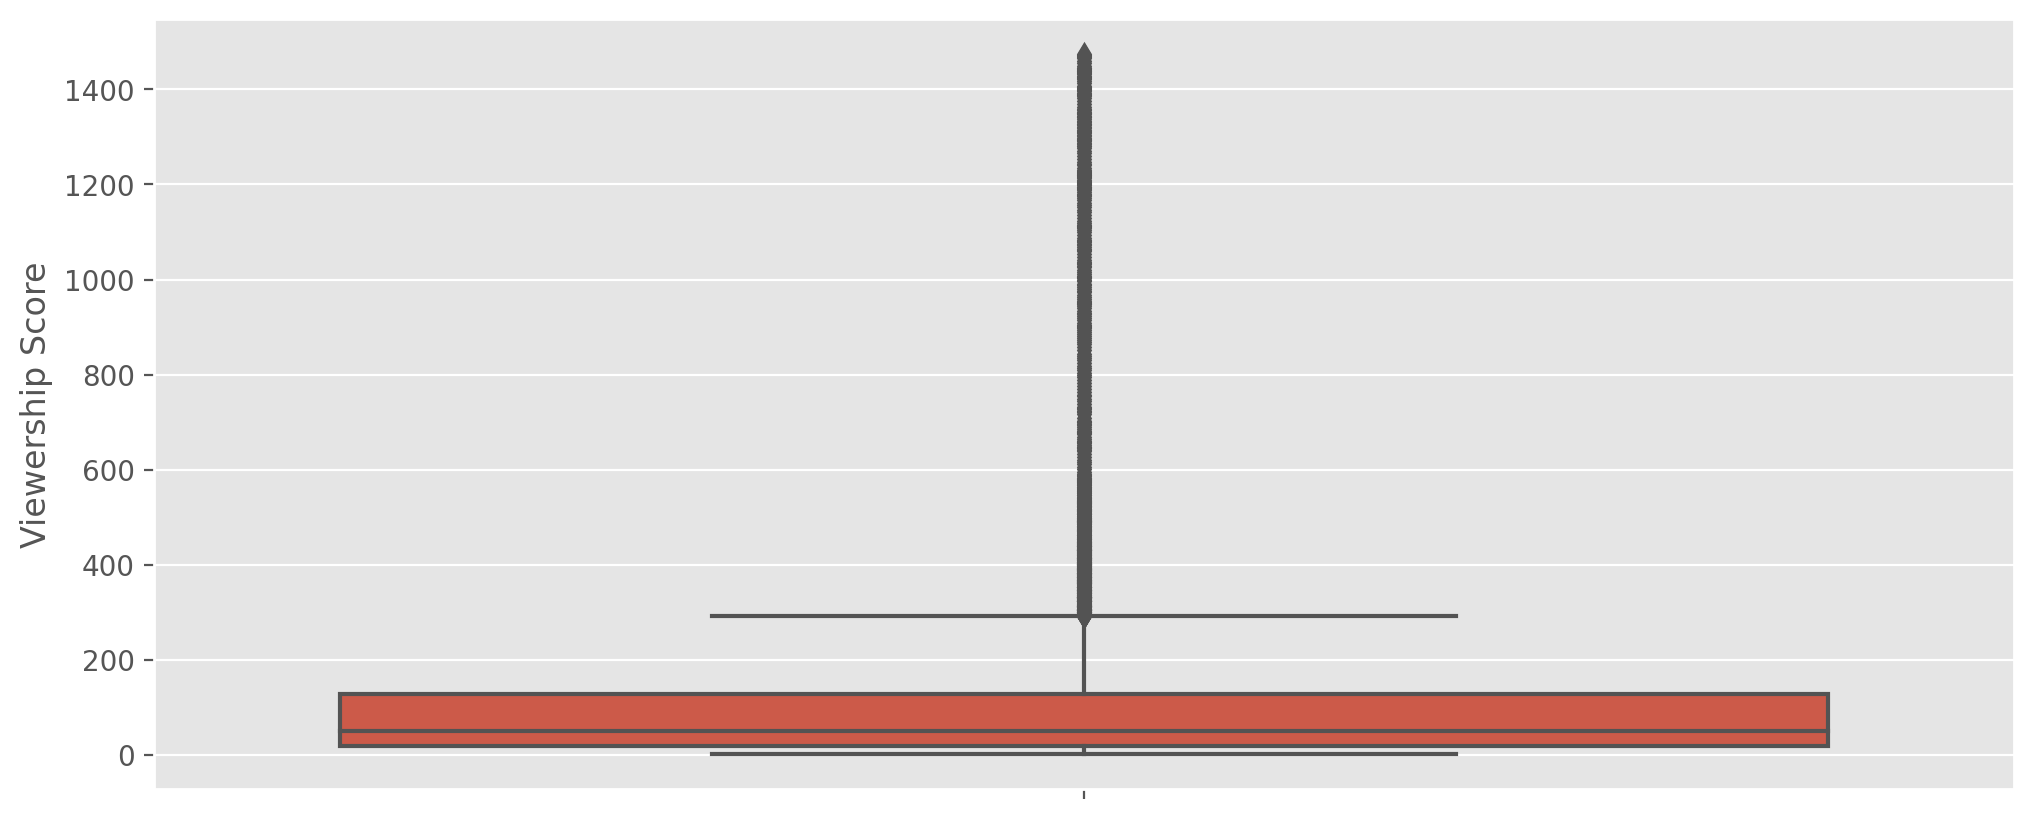

In [52]:
plt.figure(figsize = (12,5), dpi = 200)
sns.boxplot(y='Viewership Score', data = netflix)

In [53]:
q1 = netflix['Viewership Score'].quantile(0.25)
q2 = netflix['Viewership Score'].quantile(0.50)
q3 = netflix['Viewership Score'].quantile(0.75)
iqr = q3 -q1
print(q1, q2, q3, iqr, sep ='\n')

19.0
50.0
128.0
109.0


<Axes: xlabel='Type', ylabel='Viewership Score'>

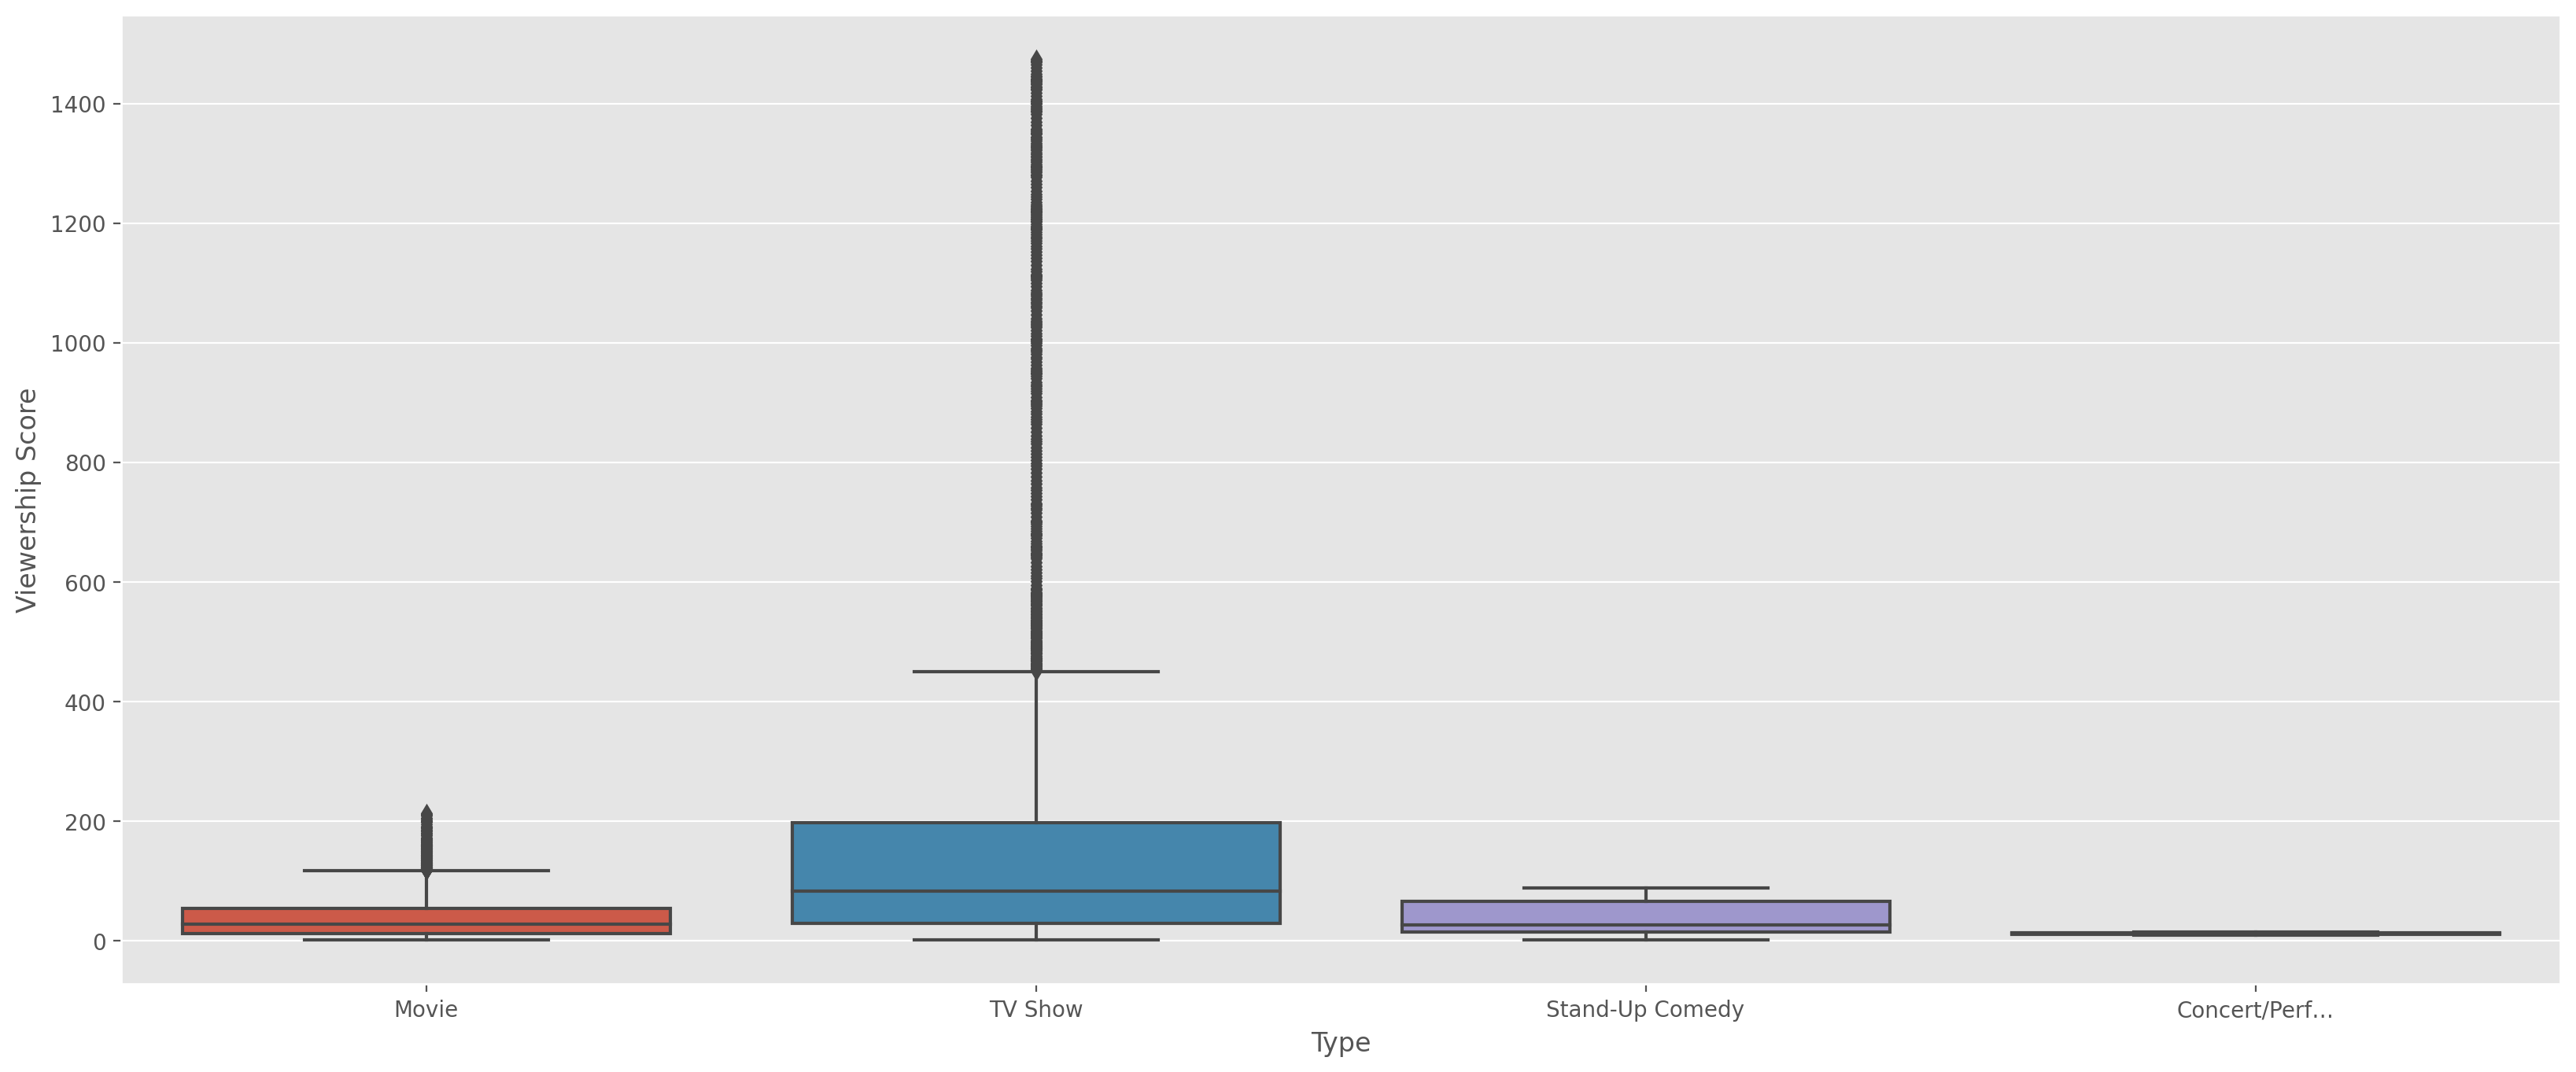

In [54]:
plt.figure(figsize = (20,8), dpi = 200)
sns.boxplot(x='Type', y='Viewership Score', data =netflix)

In [55]:
new_rank = netflix.groupby('Rank').Title.value_counts(normalize = True)
new_rank

Rank  Title                     
1     Cobra Kai                     0.038028
      Squid Game                    0.032394
      Virgin River                  0.028169
      Manifest                      0.026761
      Outer Banks                   0.026761
                                      ...   
10    Worldâs Most Wanted         0.001408
      Worth                         0.001408
      Yogi Bear                     0.001408
      jeen-yuhs: A Kanye Trilogy    0.001408
      Ãlite                        0.001408
Name: Title, Length: 2957, dtype: float64

In [56]:
# Assuming you have a 'Date' column in your DataFrame
netflix['As of'] = pd.to_datetime(netflix['As of'])  # Convert 'Date' column to datetime if not already done

# Filter data for the years 2020 to 2022
filtered_data = netflix[(netflix['As of'].dt.year >=  2020) & (netflix['As of'].dt.year <= 2022)]

# Group by 'Rank' and count the values for each title
new_rank = filtered_data.groupby('Rank')['Title'].value_counts(normalize=True)

# Display the result
print(new_rank.head(10))


Rank  Title                       
1     Cobra Kai                       0.038028
      Squid Game                      0.032394
      Virgin River                    0.028169
      Manifest                        0.026761
      Outer Banks                     0.026761
      Ginny & Georgia                 0.025352
      Lucifer                         0.025352
      The Queenâs Gambit            0.023944
      Tiger King: Murder, Mayhem …    0.023944
      You                             0.023944
Name: Title, dtype: float64


In [57]:
import pandas as pd

# Assuming you have a 'As of' column in your DataFrame
netflix['As of'] = pd.to_datetime(netflix['As of'])  # Convert 'As of' column to datetime if not already done

# Specify the target date
target_date = pd.to_datetime('2021-05-01')  # Adjust the date as needed

# Filter data for the specified month and year
filtered_data = netflix[
    (netflix['As of'].dt.year == target_date.year) & 
    (netflix['As of'].dt.month == target_date.month)
]

# Group by 'Rank' and count the values for each title
new_rank = filtered_data.groupby('Rank')['Title'].value_counts(normalize=True)

# Display the result
print(new_rank.head(10))


Rank  Title                         
1     Army of the Dead                  0.193548
      Jupiterâs Legacy                0.193548
      The Mitchells vs. The Machines    0.193548
      The Woman in the Window           0.161290
      Lucifer                           0.096774
      Who Killed Sara?                  0.064516
      Home                              0.032258
      The Sons of Sam: A Descent …      0.032258
      The Upshaws                       0.032258
2     Shadow and Bone                   0.193548
Name: Title, dtype: float64


In [58]:
# Assuming you have a 'As of' column in your DataFrame
netflix['As of'] = pd.to_datetime(netflix['As of'])  # Convert 'As of' column to datetime if not already done

# Specify the target date
target_date = pd.to_datetime('2021-01-31')  # Adjust the date as needed

# Filter data for the specified month and year
filtered_data = netflix[
    (netflix['As of'].dt.year == target_date.year) & 
    (netflix['As of'].dt.month == target_date.month)
]

# Group by 'Rank' and count the values for each title
new_rank = filtered_data.groupby('Rank')['Title'].value_counts(normalize=True)

# Display the result
print(new_rank)


Rank  Title                       
1     Bridgerton                      0.290323
      Fate: The Winx Saga             0.225806
      Cobra Kai                       0.193548
      Night Stalker: The Hunt for…    0.129032
      Outside the Wire                0.096774
                                        ...   
10    Night Stalker: The Hunt for…    0.032258
      The Croods                      0.032258
      The Netflix Afterparty          0.032258
      Unknown                         0.032258
      We Can Be Heroes                0.032258
Name: Title, Length: 149, dtype: float64


In [59]:
import pandas as pd

# Assuming you have a 'As of' and 'Viewership Score' columns in your DataFrame
netflix['As of'] = pd.to_datetime(netflix['As of'])  # Convert 'As of' column to datetime if not already done

# Specify the target date
target_date = pd.to_datetime('2021-02-28')  # Adjust the date as needed

# Filter data for the specified month and year
filtered_data = netflix[
    (netflix['As of'].dt.year == target_date.year) & 
    (netflix['As of'].dt.month == target_date.month)
]

# Get the top 10 ranks with the highest viewership score
top_10_ranks = filtered_data.nlargest(10, 'Viewership Score')['Rank']

# Filter data for the top 10 ranks
filtered_top_10_data = filtered_data[filtered_data['Rank'].isin(top_10_ranks)]

# Group by 'Rank' and count the values for each title
new_rank = filtered_top_10_data.groupby('Rank')['Title'].value_counts(normalize=True)

# Display the result
print(new_rank)


Rank  Title                       
7     Go, Dog, Go                     0.178571
      Cocomelon                       0.107143
      Red Dot                         0.107143
      Crime Scene: The Vanishing …    0.071429
      Jenni Rivera: Mariposa de B…    0.071429
                                        ...   
10    Crime Scene: The Vanishing …    0.035714
      Go, Dog, Go                     0.035714
      Jenni Rivera: Mariposa de B…    0.035714
      Red Dot                         0.035714
      The Conjuring 2                 0.035714
Name: Title, Length: 67, dtype: float64


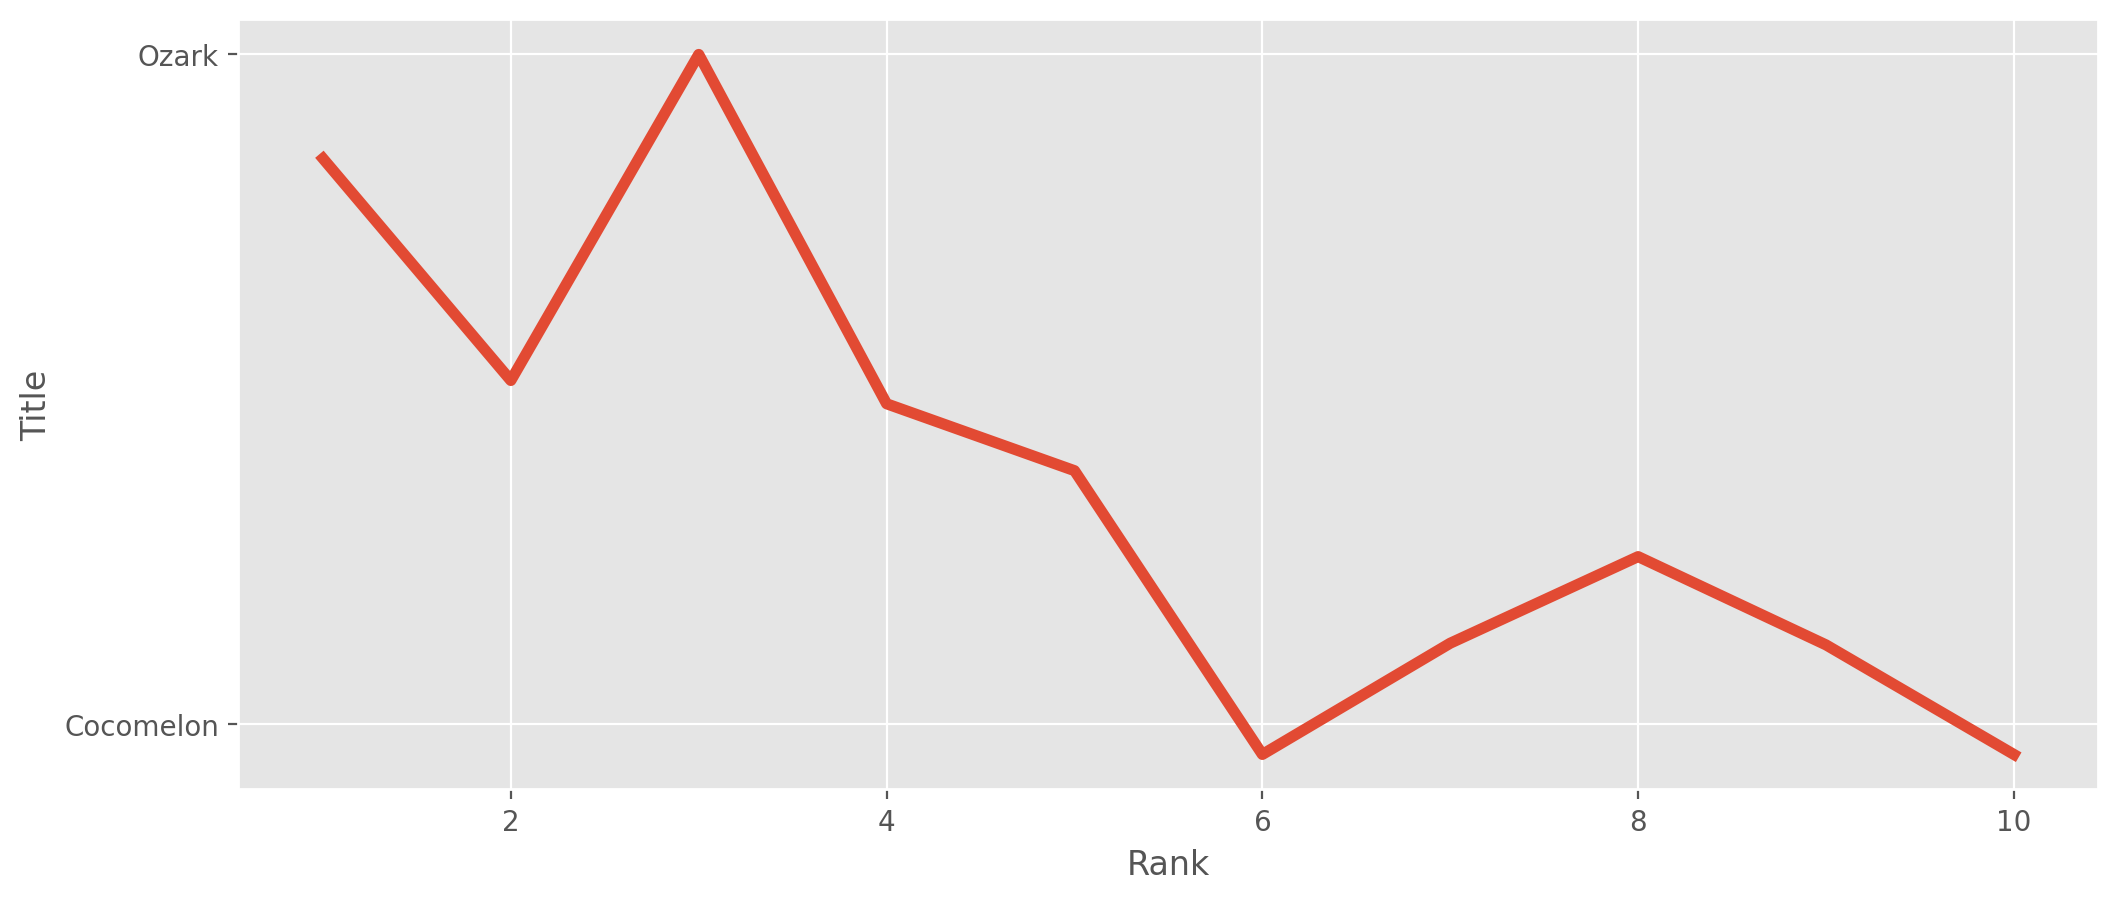

In [60]:

netflix['Date'] = pd.to_datetime(netflix['As of'])
start_date, end_date = '2020-01-01', '2022-12-31'
filtered_data = netflix[(netflix['Date'] >= start_date) & (netflix['Date'] <= end_date)]

# Assuming 'Rank' is a numeric column representing the ranking of titles
filtered_data = filtered_data[filtered_data['Rank'] > 0]

top_10_movies = filtered_data['Title'].value_counts().head(10).index
filtered_data = filtered_data[filtered_data['Title'].isin(top_10_movies)]

plt.figure(figsize=(12, 5), dpi=200)
sns.lineplot(y='Title', x='Rank', data=filtered_data, linewidth=4, palette=sns.color_palette("dark", 3), ci = None)
plt.show()


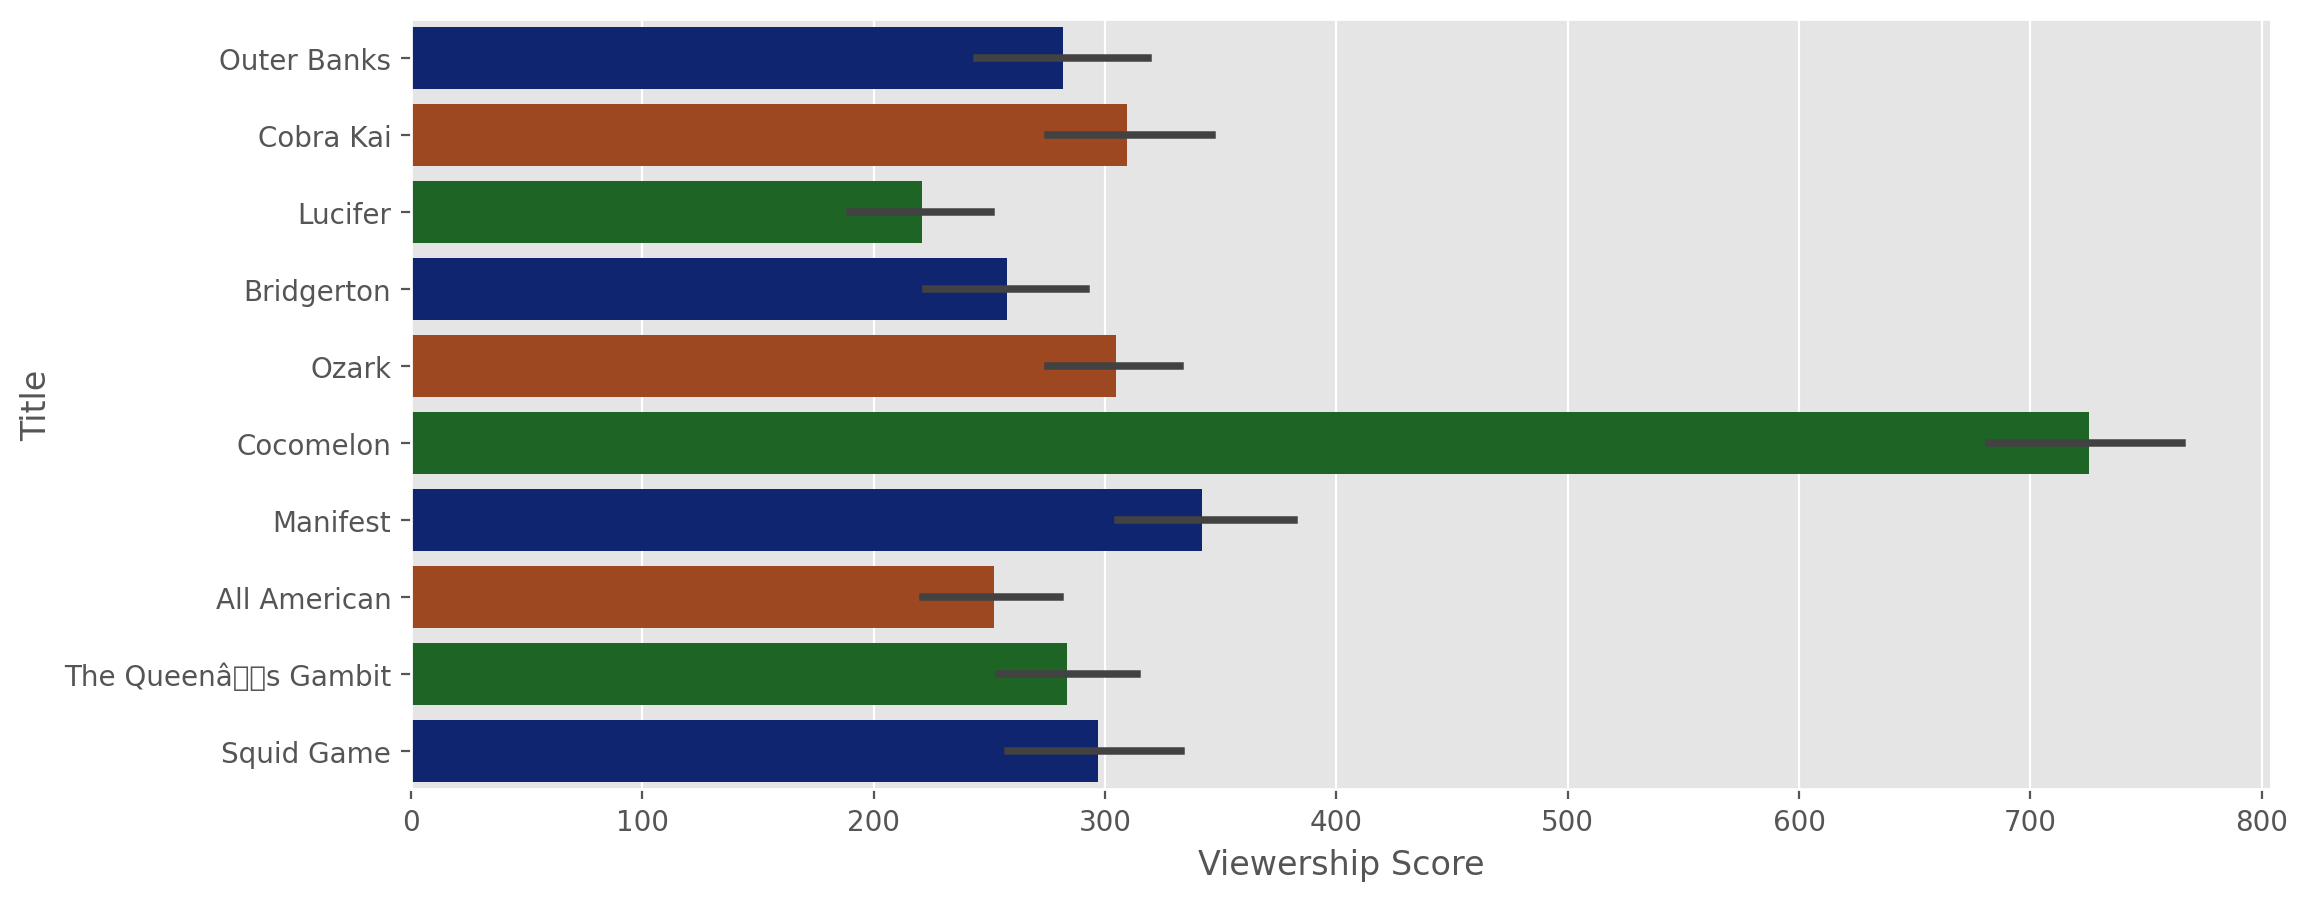

In [61]:
# title vs viewershipscore
filtered_data = filtered_data[filtered_data['Viewership Score'] > 0]

top_10_movies = filtered_data['Title'].value_counts().head(10).index
filtered_data = filtered_data[filtered_data['Title'].isin(top_10_movies)]

plt.figure(figsize=(12, 5), dpi=200)
sns.barplot(y='Title', x='Viewership Score', data=filtered_data, linewidth=4, palette=sns.color_palette("dark", 3))
plt.show()


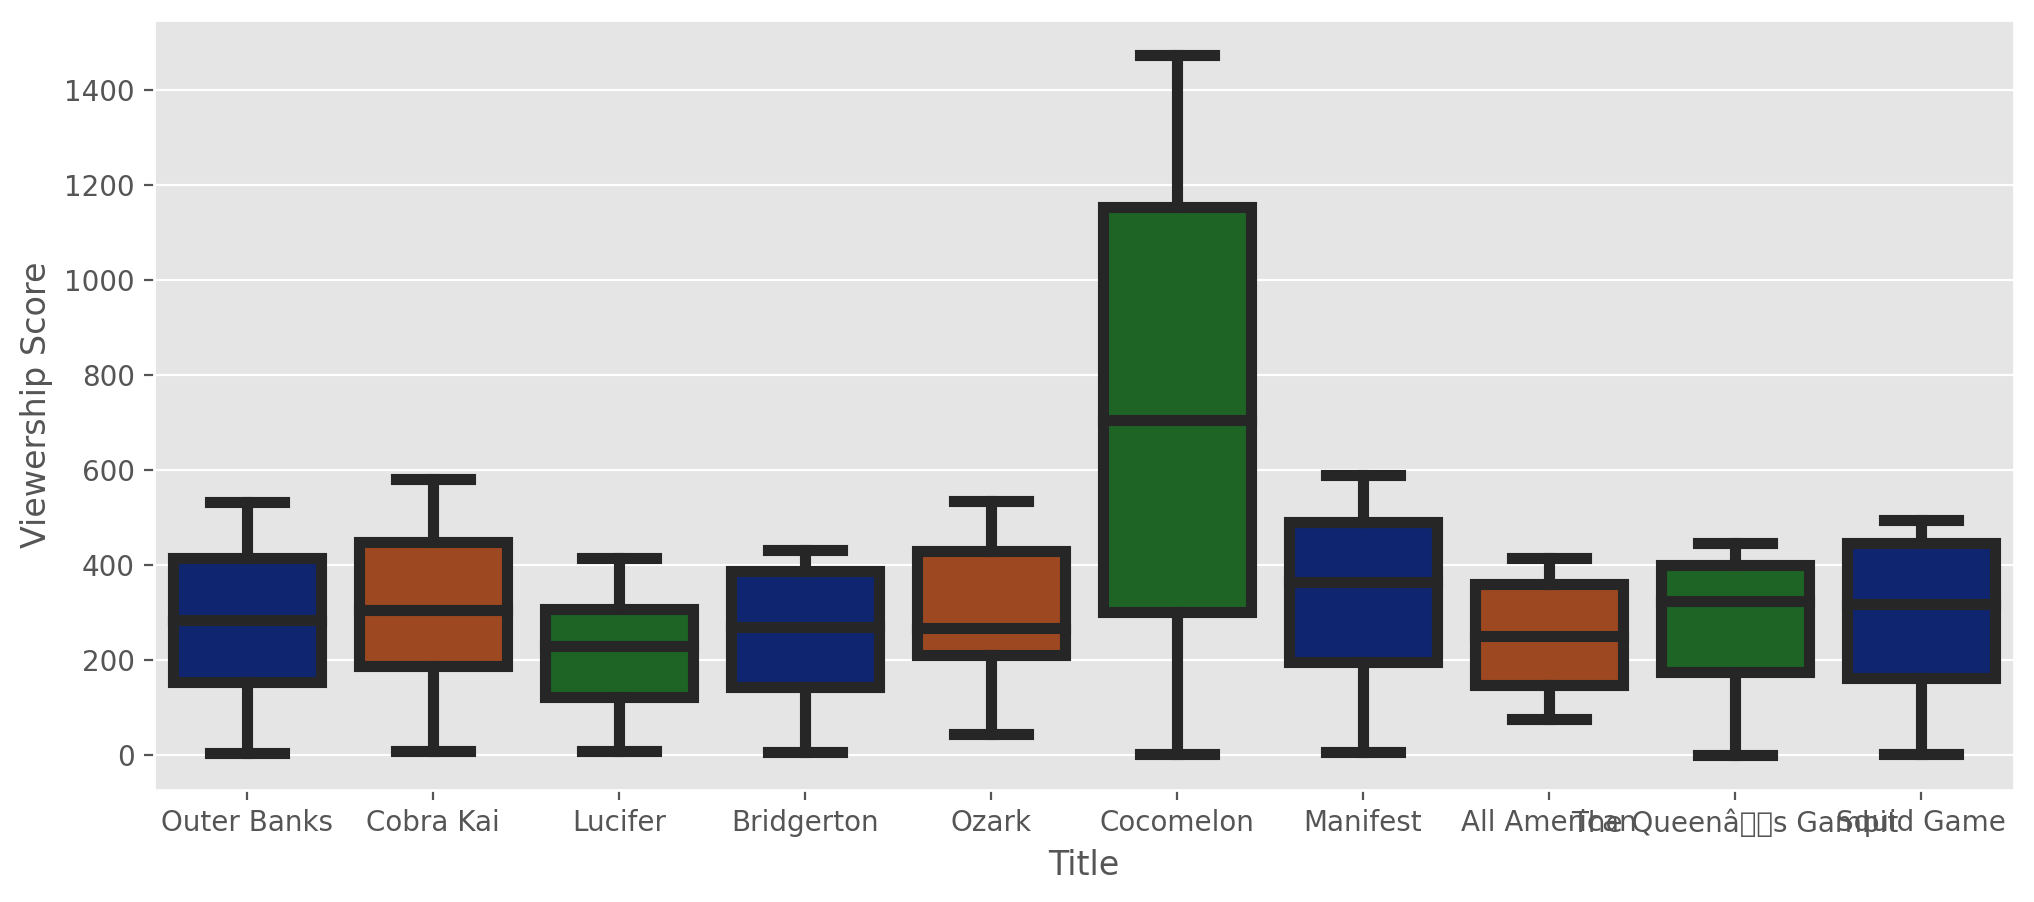

In [62]:
filtered_data = filtered_data[filtered_data['Viewership Score'] > 0]

top_10_movies = filtered_data['Title'].value_counts().head(10).index
filtered_data = filtered_data[filtered_data['Title'].isin(top_10_movies)]

plt.figure(figsize=(12, 5), dpi=200)
sns.boxplot(x='Title', y='Viewership Score', data=filtered_data, linewidth=4, palette=sns.color_palette("dark", 3))
plt.show()


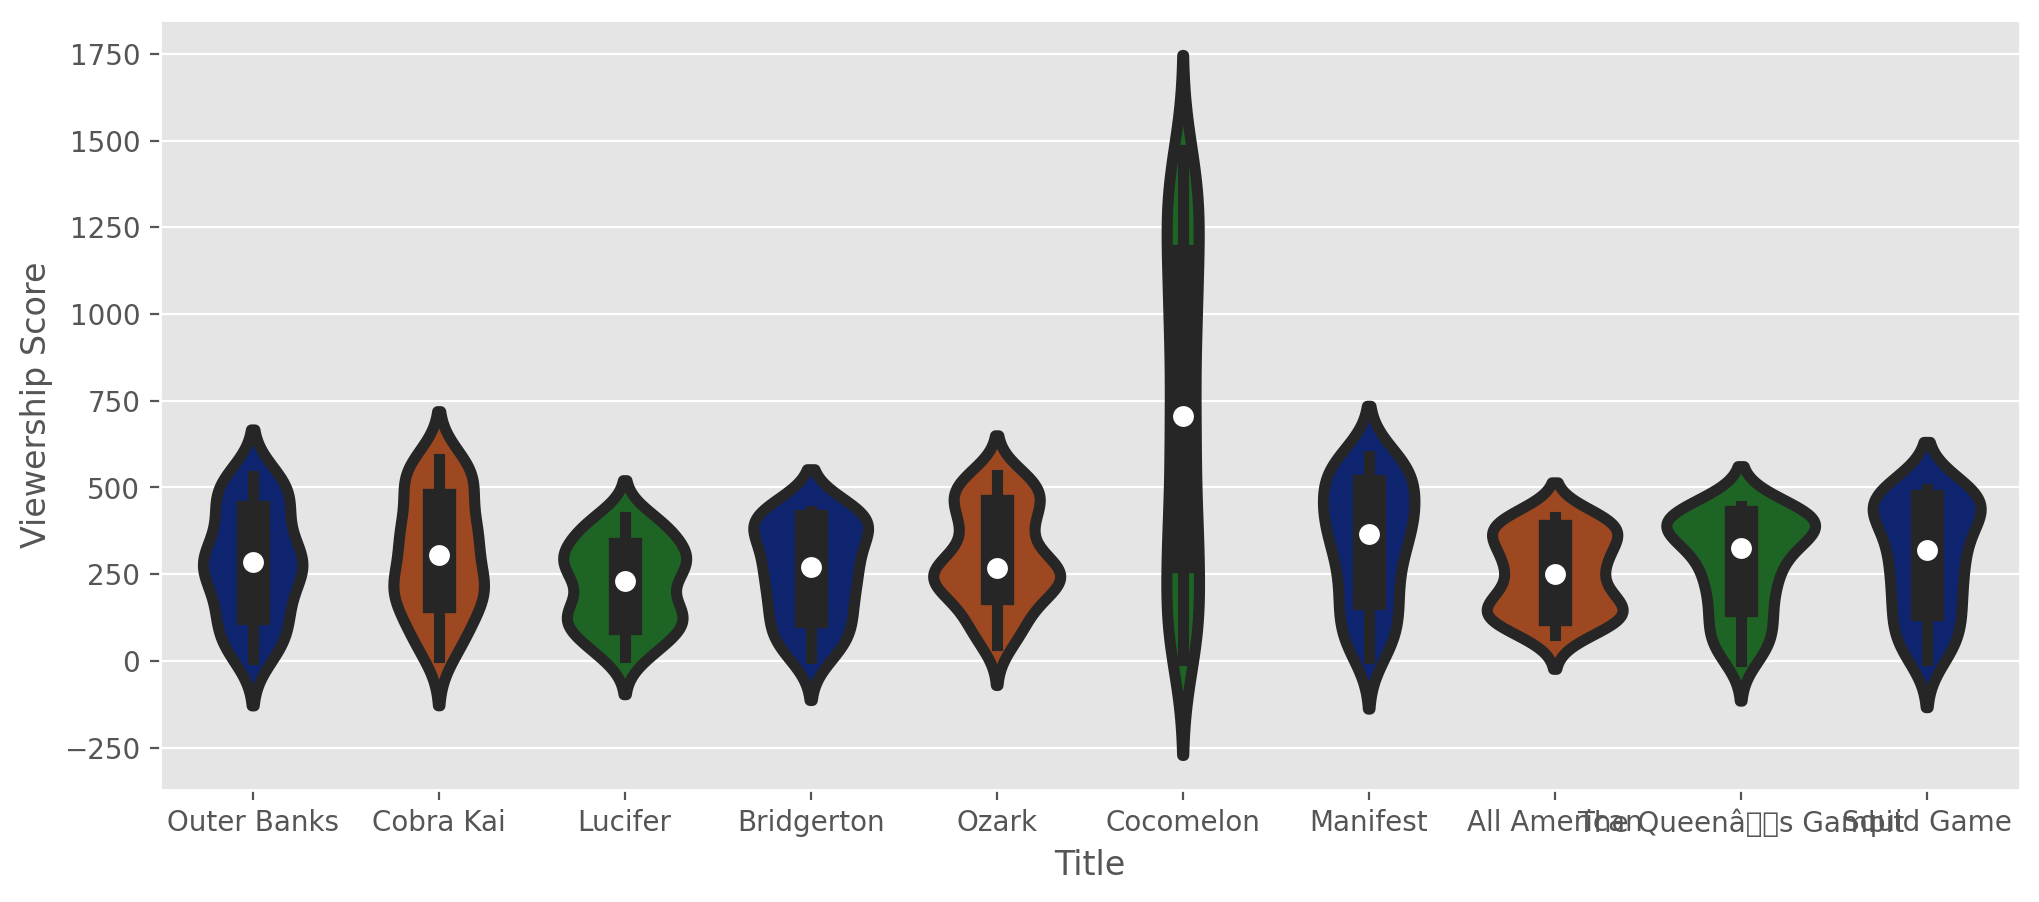

In [63]:
filtered_data = filtered_data[filtered_data['Viewership Score'] > 0]

top_10_movies = filtered_data['Title'].value_counts().head(10).index
filtered_data = filtered_data[filtered_data['Title'].isin(top_10_movies)]

plt.figure(figsize=(12, 5), dpi=200)
sns.violinplot(x='Title', y='Viewership Score', data=filtered_data, linewidth=4, palette=sns.color_palette("dark", 3))
plt.show()


<Figure size 6400x4800 with 0 Axes>

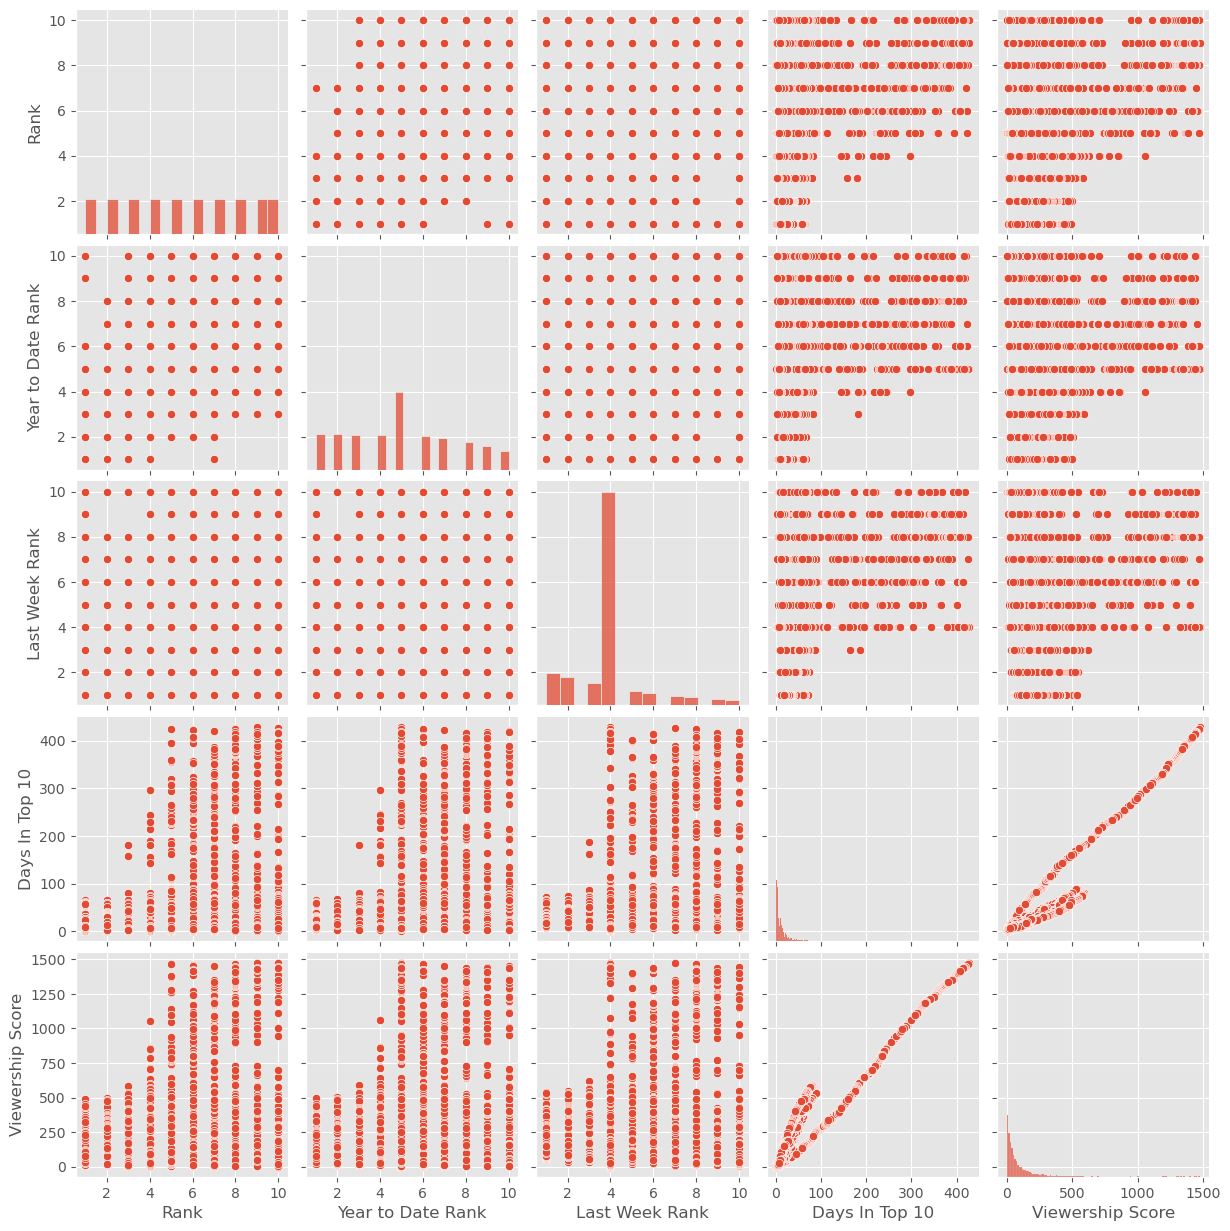

In [64]:
plt.figure(dpi=1000)
sns.pairplot(netflix)

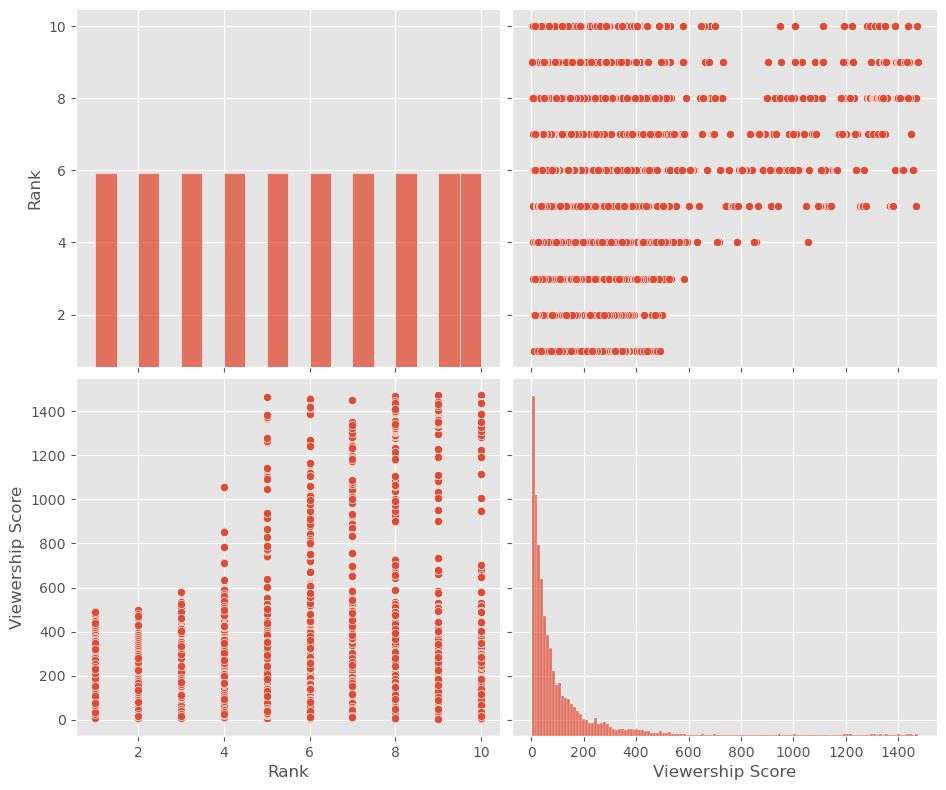

In [65]:
netflix['Date'] = pd.to_datetime(netflix['As of'])

# Create a pair plot
sns.pairplot(netflix[['Date', 'Rank', 'Title', 'Viewership Score']], height=4, aspect=1.2)

# Set title
#plt.suptitle('Pairplot of Date, Rank, Title, and Viewership Score', y=1.02)

# Show plot
plt.show()


<Figure size 12800x9600 with 0 Axes>

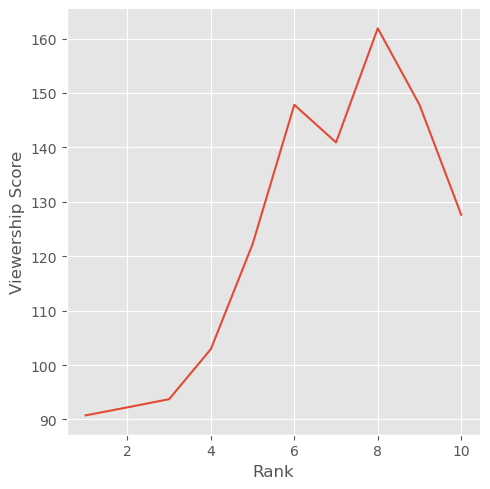

In [66]:
plt.figure(dpi = 2000)
sns.relplot(y='Viewership Score',x='Rank', data = netflix, kind = 'line', ci = None)